In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Data Retrieving

In [2]:
data=pd.read_csv('/Users/salonichawla/Desktop/PDS/Assignment1_2010/StarWars.csv',encoding='unicode escape', skiprows=2,index_col=0, header=None)

print(data.head())

             1    2                                         3   \
0                                                                
3292879998  Yes  Yes  Star Wars: Episode I  The Phantom Menace   
3292879538   No  NaN                                       NaN   
3292765271  Yes   No  Star Wars: Episode I  The Phantom Menace   
3292763116  Yes  Yes  Star Wars: Episode I  The Phantom Menace   
3292731220  Yes  Yes  Star Wars: Episode I  The Phantom Menace   

                                                     4   \
0                                                         
3292879998  Star Wars: Episode II  Attack of the Clones   
3292879538                                          NaN   
3292765271  Star Wars: Episode II  Attack of the Clones   
3292763116  Star Wars: Episode II  Attack of the Clones   
3292731220  Star Wars: Episode II  Attack of the Clones   

                                                     5   \
0                                                         
32928

In [3]:
header=['Seen_StarWars','Starwar_Fan','Seen_1','Seen_2','Seen_3','Seen_4','Seen_5','Seen_6','Rank_1','Rank_2','Rank_3','Rank_4','Rank_5','Rank_6','Han_Solo','Luke_Skywall','Princess_Leia','Anakin_Skywalker','Obi_Wan_Kenobi','Emperor_Palpatine','Darth_Vader','Lando_Calrissian','Boba_Fett','C-3PO','R2_D2','Jar_Jar_Binks','Padme_Amidala','Yoda','Char_Shot_First','Familiar_with_Expanded_Universe','Fan_of_Expanded_Universe','Fan_of_star_trek_franchise','Gender','Age','Household_Income','Education','Location']
data.columns=header
data.index.name='Respondant_ID'
data.head()

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,
3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Data Preparation

### Task 1.2

* Checking the Shape of data
* Converting Rank data type to int64 as rank as discrete values from 1-6.
* Dividing the star wars dataset into small subsets to make it easy to carry out operations in Data Preparation.

In [4]:
data.shape

(1186, 37)

In [5]:
data.dtypes

Seen_StarWars                       object
Starwar_Fan                         object
Seen_1                              object
Seen_2                              object
Seen_3                              object
Seen_4                              object
Seen_5                              object
Seen_6                              object
Rank_1                             float64
Rank_2                             float64
Rank_3                             float64
Rank_4                             float64
Rank_5                             float64
Rank_6                             float64
Han_Solo                            object
Luke_Skywall                        object
Princess_Leia                       object
Anakin_Skywalker                    object
Obi_Wan_Kenobi                      object
Emperor_Palpatine                   object
Darth_Vader                         object
Lando_Calrissian                    object
Boba_Fett                           object
C-3PO      

In [6]:
rank=['Rank_1','Rank_2','Rank_3','Rank_4','Rank_5','Rank_6'] #subsetting Rank columns
data[rank]=data[rank].astype('Int64') # Converting rank from float to int
colObj=list(data.select_dtypes(['object']).columns) # subsetting all object columns
seen=['Seen_1','Seen_2','Seen_3','Seen_4','Seen_5','Seen_6',] # subsetting all Seen columns
data[seen]=data[seen]
Rate_char=['Han_Solo','Luke_Skywall','Princess_Leia','Anakin_Skywalker','Obi_Wan_Kenobi','Emperor_Palpatine','Darth_Vader','Lando_Calrissian','Boba_Fett','C-3PO','R2_D2','Jar_Jar_Binks','Padme_Amidala','Yoda'] # subsetting columns with rating for each Character
demographics=['Gender','Age','Household_Income','Education','Location'] #Subsetting all columns with personal info
StarWars=['Char_Shot_First','Familiar_with_Expanded_Universe','Fan_of_Expanded_Universe','Fan_of_star_trek_franchise'] # subsetting the extra info columns

### Task 1.5

* Converting all the text data to uppercase as it will help reduce some of the typos which were caused due to the difference in upper and lower case values.

In [7]:

data[colObj]=data[colObj].apply(lambda x: x.str.upper())

### Task 1.4

* Stripping all the White spaces from all the object type variables to minimize the typos.

In [8]:
data[colObj] = data[colObj].apply(lambda x: x.str.strip())

### Task 1.3

* First I have used a for loop to check the unique values in all the object variables in the dataset, this would help to identify the typos in all the columns at once.
* I have used replace function to replace the typos with appropriate missing values.

In [9]:
for col in colObj:
    print(col, data[col].unique())
    

Seen_StarWars ['YES' 'NO']
Starwar_Fan ['YES' nan 'NO' 'YESS' 'NOO']
Seen_1 ['STAR WARS: EPISODE I  THE PHANTOM MENACE' nan]
Seen_2 ['STAR WARS: EPISODE II  ATTACK OF THE CLONES' nan]
Seen_3 ['STAR WARS: EPISODE III  REVENGE OF THE SITH' nan]
Seen_4 ['STAR WARS: EPISODE IV  A NEW HOPE' nan]
Seen_5 ['STAR WARS: EPISODE V THE EMPIRE STRIKES BACK' nan]
Seen_6 ['STAR WARS: EPISODE VI RETURN OF THE JEDI' nan]
Han_Solo ['VERY FAVORABLY' nan 'SOMEWHAT FAVORABLY'
 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' 'SOMEWHAT UNFAVORABLY'
 'UNFAMILIAR (N/A)' 'VERY UNFAVORABLY']
Luke_Skywall ['VERY FAVORABLY' nan 'SOMEWHAT FAVORABLY' 'SOMEWHAT UNFAVORABLY'
 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' 'VERY UNFAVORABLY'
 'UNFAMILIAR (N/A)']
Princess_Leia ['VERY FAVORABLY' nan 'SOMEWHAT FAVORABLY' 'SOMEWHAT UNFAVORABLY'
 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)' 'VERY UNFAVORABLY'
 'UNFAMILIAR (N/A)']
Anakin_Skywalker ['VERY FAVORABLY' nan 'SOMEWHAT FAVORABLY' 'SOMEWHAT UNFAVORABLY'
 'NEITHER FAVO

In [10]:
data.astype('object').describe(include='all').loc['unique', :]

Seen_StarWars                      2
Starwar_Fan                        4
Seen_1                             1
Seen_2                             1
Seen_3                             1
Seen_4                             1
Seen_5                             1
Seen_6                             1
Rank_1                             6
Rank_2                             6
Rank_3                             6
Rank_4                             6
Rank_5                             6
Rank_6                             6
Han_Solo                           6
Luke_Skywall                       6
Princess_Leia                      6
Anakin_Skywalker                   6
Obi_Wan_Kenobi                     6
Emperor_Palpatine                  6
Darth_Vader                        6
Lando_Calrissian                   6
Boba_Fett                          6
C-3PO                              6
R2_D2                              6
Jar_Jar_Binks                      6
Padme_Amidala                      6
Y

In [11]:
data['Starwar_Fan'] = data['Starwar_Fan'].str.replace('NOO', 'NO')
data['Starwar_Fan'] = data['Starwar_Fan'].str.replace('YESS', 'YES')
data['Starwar_Fan'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [12]:
data['Fan_of_Expanded_Universe'] = data['Fan_of_Expanded_Universe'].str.replace('YESS', 'YES')
data['Fan_of_Expanded_Universe'].unique()

array(['NO', nan, 'YES'], dtype=object)

In [13]:
data['Fan_of_star_trek_franchise'] = data['Fan_of_star_trek_franchise'].str.replace('NOO', 'NO')
data['Fan_of_star_trek_franchise'] = data['Fan_of_star_trek_franchise'].str.replace('YESS', 'YES')
data['Fan_of_star_trek_franchise'].unique()

array(['NO', 'YES', nan], dtype=object)

In [14]:
data['Gender'] = data['Gender'].replace('F', 'FEMALE')
data['Gender'].unique()

array(['MALE', nan, 'FEMALE'], dtype=object)

## Task 1.6

### Sanity Checks

#### Check 1 - Checking and replacing impossible values

In [15]:
data['Age'].unique()

array(['18-29', nan, '500', '30-44', '> 60', '45-60'], dtype=object)

In [16]:
data['Age'].mode()

0    45-60
dtype: object

In [17]:
data['Age'] = data['Age'].str.replace('500', '45-60')
data['Age'].unique()

array(['18-29', nan, '45-60', '30-44', '> 60'], dtype=object)

#### Check 2- Checking for values in numeric variables.

In [18]:
data[rank].describe()

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6
count,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


#### Check 3-  Checking whether all the people who have seen starwars movies have infact ranked the movie.

In [19]:
data1=data.copy()

In [20]:
data1.loc[(~(data1.Seen_1.isna())) & (data1.Rank_1.isna())]

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,


In [21]:
data1.loc[(~data1.Seen_2.isna()) & (data1.Rank_2.isna())]

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,


In [22]:
data1.loc[(~data1.Seen_3.isna()) & (data1.Rank_3.isna())]

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,
3290687830,YES,YES,STAR WARS: EPISODE I THE PHANTOM MENACE,STAR WARS: EPISODE II ATTACK OF THE CLONES,STAR WARS: EPISODE III REVENGE OF THE SITH,STAR WARS: EPISODE IV A NEW HOPE,STAR WARS: EPISODE V THE EMPIRE STRIKES BACK,STAR WARS: EPISODE VI RETURN OF THE JEDI,1,2,...,VERY FAVORABLY,HAN,NO,NaN,YES,MALE,30-44,"$100,000 - $149,999",BACHELOR DEGREE,MIDDLE ATLANTIC


In [23]:
data1.loc[(~data1.Seen_4.isna()) & (data1.Rank_4.isna())]

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,


In [24]:
data1.loc[(~data1.Seen_5.isna()) & (data1.Rank_5.isna())]

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,


In [25]:
data1.loc[(~data1.Seen_6.isna()) & (data1.Rank_6.isna())]

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,


#### CHECK 4: If a person has not seen any star wars movie and has still ranked them. 
For this we check that the number of people missing in Seen columns should be equal to the number of missing values in ranks.

In [26]:
data1.loc[(data1.Seen_1.isna())& (~(data1.Rank_1.isna()))].shape

(162, 37)

In [27]:
data1.loc[(data1.Seen_2.isna())& (~(data1.Rank_2.isna()))].shape

(265, 37)

In [28]:
data1.loc[(data1.Seen_3.isna())& (~(data1.Rank_3.isna()))].shape

(286, 37)

In [29]:
data1.loc[(data1.Seen_4.isna())& (~(data1.Rank_4.isna()))].shape

(229, 37)

In [30]:
data1.loc[(data1.Seen_5.isna())& (~(data1.Rank_5.isna()))].shape

(78, 37)

In [31]:
data1.loc[(data1.Seen_6.isna())& (~(data1.Rank_6.isna()))].shape

(98, 37)

####  Check 5: Checking the columns where a respondant has seen star wars movie but has not entered any movie in Seen columns but the respondant has given thier demographics information.

In [32]:
data1.loc[(data1['Seen_StarWars']=='YES') & ((data1.Seen_1.isna()) & (data1.Seen_2.isna())&(data1.Seen_3.isna())&(data1.Seen_4.isna())&(data1.Seen_5.isna())&(data1.Seen_6.isna())&(~data1.Age.isna()))].transpose()

Respondant_ID,3290380140
Seen_StarWars,YES
Starwar_Fan,NO
Seen_1,NaN
Seen_2,NaN
Seen_3,NaN
Seen_4,NaN
Seen_5,NaN
Seen_6,NaN
Rank_1,2
Rank_2,3


#### Since we have only one such row and the demographics are also available of the respondant, we can simply ignore this observation and use the demographic values if required in our analysis. 

# Missing Values

### Check:1  Drop rows with no values other than first two columns i.e.=110 rows

In [33]:
data1.shape

(1186, 37)

In [34]:
data_drop=data1.dropna(axis=0, how='any', thresh=2, subset=None, inplace=False)

In [35]:
data_drop.shape

(1076, 37)

In [36]:
data_drop.loc[data1['Seen_StarWars']=='YES'].isna().sum()

Seen_StarWars                        0
Starwar_Fan                          0
Seen_1                             163
Seen_2                             265
Seen_3                             286
Seen_4                             229
Seen_5                              78
Seen_6                              98
Rank_1                               1
Rank_2                               0
Rank_3                               1
Rank_4                               0
Rank_5                               0
Rank_6                               0
Han_Solo                             7
Luke_Skywall                         5
Princess_Leia                        5
Anakin_Skywalker                    13
Obi_Wan_Kenobi                      11
Emperor_Palpatine                   22
Darth_Vader                         10
Lando_Calrissian                    16
Boba_Fett                           24
C-3PO                                9
R2_D2                                6
Jar_Jar_Binks            

 ###  Check 2: Replace yes and no in seen columns  for a particular episode if a person has checked in YES for Seen_StarWars.

In [37]:
for col in seen:
    data_drop.loc[~data_drop[col].isna(),col]='YES'
    data_drop.loc[(data_drop.Seen_StarWars== 'YES') & ( data_drop[col].isna()), col] = 'NO'

In [38]:
data_drop.head()

,Seen_StarWars,Starwar_Fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Rank_1,Rank_2,...,Yoda,Char_Shot_First,Familiar_with_Expanded_Universe,Fan_of_Expanded_Universe,Fan_of_star_trek_franchise,Gender,Age,Household_Income,Education,Location
Respondant_ID,,,,,,,,,,,,,,,,,,,,,
3292879998,YES,YES,YES,YES,YES,YES,YES,YES,3,2,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
3292879538,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
3292765271,YES,NO,YES,YES,YES,NO,NO,NO,1,2,...,UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NaN,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
3292763116,YES,YES,YES,YES,YES,YES,YES,YES,5,6,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
3292731220,YES,YES,YES,YES,YES,YES,YES,YES,5,4,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL


###  Check 3: Replacing nan values in rank columns where a person who has given a rank without seeing a Star Wars movie. The ranks would not be credible in this case.

In [39]:
data_drop.loc[(data_drop.Seen_1=='NO') & (data_drop.Rank_1!=np.nan),'Rank_1']= np.nan
data_drop.loc[(data_drop.Seen_2=='NO') & (data_drop.Rank_2!=np.nan),'Rank_2']= np.nan
data_drop.loc[(data_drop.Seen_3=='NO') & (data_drop.Rank_3!=np.nan),'Rank_3']= np.nan
data_drop.loc[(data_drop.Seen_4=='NO') & (data_drop.Rank_4!=np.nan),'Rank_4']= np.nan
data_drop.loc[(data_drop.Seen_5=='NO') & (data_drop.Rank_5!=np.nan),'Rank_5']= np.nan
data_drop.loc[(data_drop.Seen_6=='NO') & (data_drop.Rank_6!=np.nan),'Rank_6']= np.nan

In [40]:
data_drop.loc[data_drop['Seen_StarWars']=='YES'].isna().sum()

Seen_StarWars                        0
Starwar_Fan                          0
Seen_1                               0
Seen_2                               0
Seen_3                               0
Seen_4                               0
Seen_5                               0
Seen_6                               0
Rank_1                             163
Rank_2                             265
Rank_3                             287
Rank_4                             229
Rank_5                              78
Rank_6                              98
Han_Solo                             7
Luke_Skywall                         5
Princess_Leia                        5
Anakin_Skywalker                    13
Obi_Wan_Kenobi                      11
Emperor_Palpatine                   22
Darth_Vader                         10
Lando_Calrissian                    16
Boba_Fett                           24
C-3PO                                9
R2_D2                                6
Jar_Jar_Binks            

###  Check 4: For all the columns in Rate_char we will replace the missing values with mode where the respondant has seen the StarWars episodes.

In [41]:
for cols in Rate_char:
    a=data_drop[cols].mode()
    data_drop.loc[(data_drop['Seen_StarWars']=='YES') & (data_drop[cols].isna()),cols]=a[0]
    

### Check 5: For the columns  Char_Shot_First, Familiar_with_Expanded_Universe, Fan_of_star_trek_franchise also we will replace the values with mode if the respondant has seen starwars episodes.

In [42]:
for cols in ['Char_Shot_First', 'Familiar_with_Expanded_Universe', 'Fan_of_star_trek_franchise']:
    b=data_drop[cols].mode()
    data_drop.loc[(data_drop['Seen_StarWars']=='YES') & (data_drop[cols].isna()),cols]=b[0]

###  Check 6: Replace the missing values in demographics of respondants in the data.

#### Since it is a personal choice for the people to provide their personal information I would replace the missing values with NA- Not Answered 

In [43]:
data_drop[demographics]=data_drop[demographics].fillna(value='NA')

In [44]:
data_drop.loc[data_drop['Seen_StarWars']=='YES'].isna().sum()

Seen_StarWars                        0
Starwar_Fan                          0
Seen_1                               0
Seen_2                               0
Seen_3                               0
Seen_4                               0
Seen_5                               0
Seen_6                               0
Rank_1                             163
Rank_2                             265
Rank_3                             287
Rank_4                             229
Rank_5                              78
Rank_6                              98
Han_Solo                             0
Luke_Skywall                         0
Princess_Leia                        0
Anakin_Skywalker                     0
Obi_Wan_Kenobi                       0
Emperor_Palpatine                    0
Darth_Vader                          0
Lando_Calrissian                     0
Boba_Fett                            0
C-3PO                                0
R2_D2                                0
Jar_Jar_Binks            

* The columns that have missing values are Ranks and Fan_of_Expanded_Universe.
* The Ranks that are missing were set to missing as their response is not considered credible.
* Fan_of_Expanded_Universe this question is only available to the respondant if they are familiar with the expanded universe.
* We have exactly 615 who are not familiar with expanded universe and 8 missing values.

In [45]:
data_drop.loc[data_drop['Seen_StarWars']=='NO'].isna().sum()

Seen_StarWars                        0
Starwar_Fan                        240
Seen_1                             240
Seen_2                             240
Seen_3                             240
Seen_4                             240
Seen_5                             240
Seen_6                             240
Rank_1                             240
Rank_2                             240
Rank_3                             240
Rank_4                             240
Rank_5                             240
Rank_6                             240
Han_Solo                           240
Luke_Skywall                       240
Princess_Leia                      240
Anakin_Skywalker                   240
Obi_Wan_Kenobi                     240
Emperor_Palpatine                  240
Darth_Vader                        240
Lando_Calrissian                   240
Boba_Fett                          240
C-3PO                              240
R2_D2                              240
Jar_Jar_Binks            

## Task 2 

 ###  Task 2.1- Explore the survey question: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I The Phantom Menace; Star Wars: Episode II Attack of the Clones; Star Wars: Episode III Revenge of the Sith;	Star Wars: Episode IV A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi) Then analysis how people rate Star Wars Movies.

In [46]:
data_drop[rank].mode()

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6
0,4,5,4,1,1,2


AxesSubplot(0.125,0.594439;0.227941x0.227941)
AxesSubplot(0.398529,0.594439;0.227941x0.227941)
AxesSubplot(0.672059,0.594439;0.227941x0.227941)
AxesSubplot(0.125,0.18262;0.227941x0.227941)
AxesSubplot(0.398529,0.18262;0.227941x0.227941)
AxesSubplot(0.672059,0.18262;0.227941x0.227941)


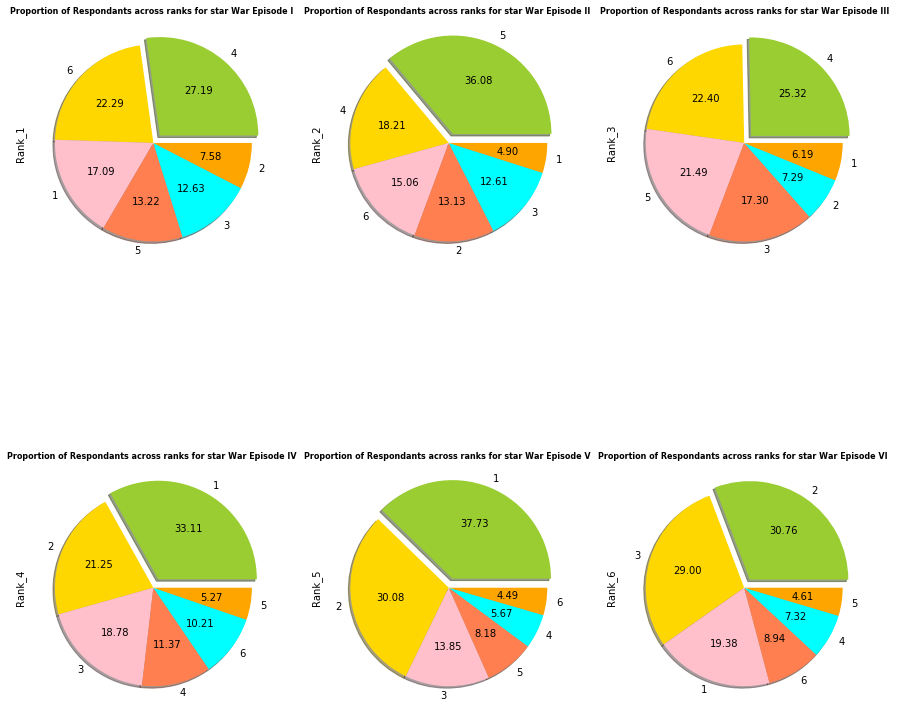

In [47]:
colors = ['yellowgreen', 'gold', 'pink', 'coral','cyan','orange']
explode = (0.1, 0, 0, 0,0,0) 
plt.subplot(2,3,1)
A= data_drop['Rank_1'].value_counts().plot(kind='pie',autopct='%.2f',colors=colors,explode=explode,shadow=True,figsize=[15,15])
plt.title('Proportion of Respondants across ranks for star War Episode I ',fontweight='bold',fontsize=8)
print(A)
plt.subplot(2,3,2)
B= data_drop['Rank_2'].value_counts().plot(kind='pie',autopct='%.2f',colors=colors,explode=explode,shadow=True)
plt.title('Proportion of Respondants across ranks for star War Episode II ',fontweight='bold',fontsize=8)
print(B)
plt.subplot(2,3,3)
C= data_drop['Rank_3'].value_counts().plot(kind='pie',autopct='%.2f',colors=colors,explode=explode,shadow=True)
plt.title('Proportion of Respondants across ranks for star War Episode III',fontweight='bold',fontsize=8)
print(C)
plt.subplot(2,3,4)
D= data_drop['Rank_4'].value_counts().plot(kind='pie',autopct='%.2f',colors=colors,explode=explode,shadow=True)
plt.title('Proportion of Respondants across ranks for star War Episode IV ',fontweight='bold',fontsize=8)
print(D)
plt.subplot(2,3,5)
E= data_drop['Rank_5'].value_counts().plot(kind='pie',autopct='%.2f',colors=colors,explode=explode,shadow=True)
plt.title('Proportion of Respondants across ranks for star War Episode V ',fontweight='bold',fontsize=8)
print(E)
plt.subplot(2,3,6)
F= data_drop['Rank_6'].value_counts().plot(kind='pie',autopct='%.2f',colors=colors,explode=explode,shadow=True)
plt.title('Proportion of Respondants across ranks for star War Episode VI ',fontweight='bold',fontsize=8)
print(F)
plt.show()

In [48]:
# Using for loop to give the maximum and minimum number of people for each rank auch as !st episode is given maximum 4 rank my most people who have seen it and minimum 2 rank with 6 being the most favourable.
for col in rank:
    print(data_drop.groupby(col).size())
    print('MAX:', data_drop.groupby(col).size().max())
    print('MIN:', data_drop.groupby(col).size().min())

Rank_1
1    115
2     51
3     85
4    183
5     89
6    150
dtype: int64
MAX: 183
MIN: 51
Rank_2
1     28
2     75
3     72
4    104
5    206
6     86
dtype: int64
MAX: 206
MIN: 28
Rank_3
1     34
2     40
3     95
4    139
5    118
6    123
dtype: int64
MAX: 139
MIN: 34
Rank_4
1    201
2    129
3    114
4     69
5     32
6     62
dtype: int64
MAX: 201
MIN: 32
Rank_5
1    286
2    228
3    105
4     43
5     62
6     34
dtype: int64
MAX: 286
MIN: 34
Rank_6
1    143
2    227
3    214
4     54
5     34
6     66
dtype: int64
MAX: 227
MIN: 34


In [49]:
rank

['Rank_1', 'Rank_2', 'Rank_3', 'Rank_4', 'Rank_5', 'Rank_6']

In [50]:
mr=[]

for col in rank:
    mr.append(data_drop[col].mean())



Text(0.5, 1.0, 'Average rank for each Star Wars episode')

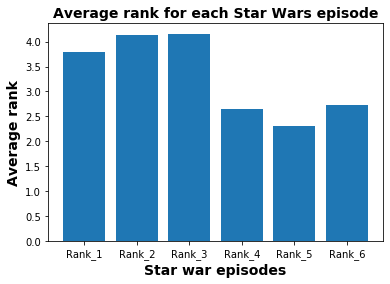

In [51]:
plt.bar(rank,mr,)
plt.xlabel('Star war episodes',fontweight='bold',fontsize=14)
plt.ylabel('Average rank',fontweight='bold',fontsize=14)
plt.title('Average rank for each Star Wars episode',fontweight='bold',fontsize=14)

##  Task 2.2

#### Explore the relationships between columns. You may choose which pairs of columns to focus on, but you need to generate 3 visualisations for this subtask. These should address a plausible hypothesis for the data concerned. Please also format the graph as required in Task 2.1. 

###  Hypothesis 1-  The respondants who are a fan of Star Wars are also a fan of Star Trek Franchise.

Text(0.5, 0, 'StarWar Fan')

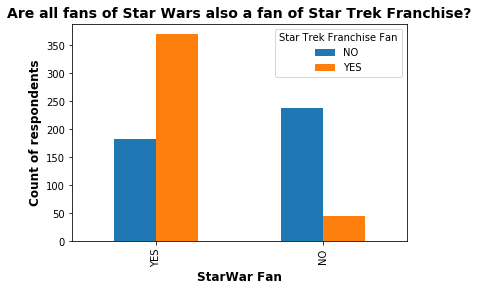

In [52]:
ax=pd.crosstab(data_drop['Starwar_Fan'],data_drop.Fan_of_star_trek_franchise)
myorder=['YES','NO']
reordered=ax.reindex(myorder)
ax=reordered.plot.bar()

plt.title('Are all fans of Star Wars also a fan of Star Trek Franchise?',fontweight='bold',fontsize=14)


# Put a legend to the right of the current axis

plt.legend(title='Star Trek Franchise Fan')
plt.ylabel('Count of respondents',fontweight='bold',fontsize=12)
plt.xlabel('StarWar Fan',fontweight='bold',fontsize=12)

###  Hypothesis 2 : Among the respondents who view the Character of Han Solo as favorable, most of them are within  the age group 30-44.

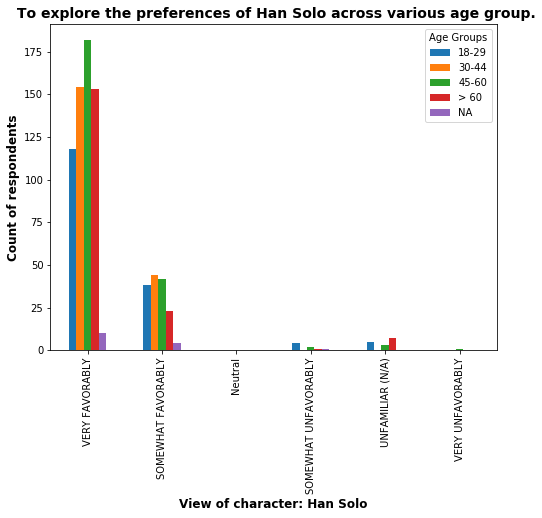

In [53]:
ax=pd.crosstab(data_drop.Han_Solo, data_drop.Age)
myorder=['VERY FAVORABLY','SOMEWHAT FAVORABLY','Neutral','SOMEWHAT UNFAVORABLY','UNFAMILIAR (N/A)','VERY UNFAVORABLY']
reordered=ax.reindex(myorder)
ax=reordered.plot.bar(figsize=[8,6])
plt.title(' To explore the preferences of Han Solo across various age group.',fontweight='bold',fontsize=14)


plt.legend(title='Age Groups')
plt.xlabel('View of character: Han Solo',fontweight='bold',fontsize=12)
plt.ylabel('Count of respondents',fontweight='bold',fontsize=12)
plt.show()

###  Hypothesis 3-  The number of respondents who are Familiar with Expanded Universe are also a fan of Star Trek Franchise.

Text(0.5, 0, 'Familiar with Expanded Universe')

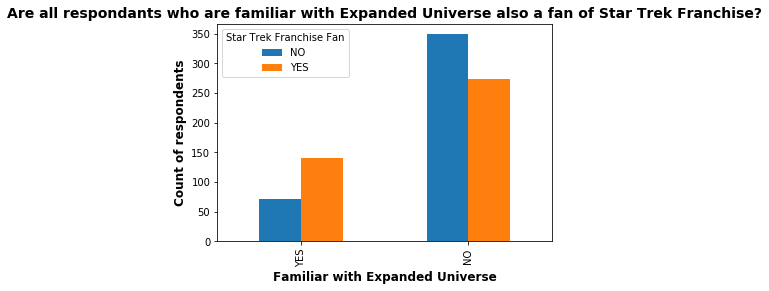

In [54]:
ax=pd.crosstab(data_drop['Familiar_with_Expanded_Universe'],data_drop.Fan_of_star_trek_franchise)
myorder=['YES','NO']
reordered=ax.reindex(myorder)
ax=reordered.plot.bar()

plt.title('Are all respondants who are familiar with Expanded Universe also a fan of Star Trek Franchise?',fontweight='bold',fontsize=14)


plt.legend(title='Star Trek Franchise Fan')
plt.ylabel('Count of respondents',fontweight='bold',fontsize=12)
plt.xlabel('Familiar with Expanded Universe',fontweight='bold',fontsize=12)

###  Task 2.3 : Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters.

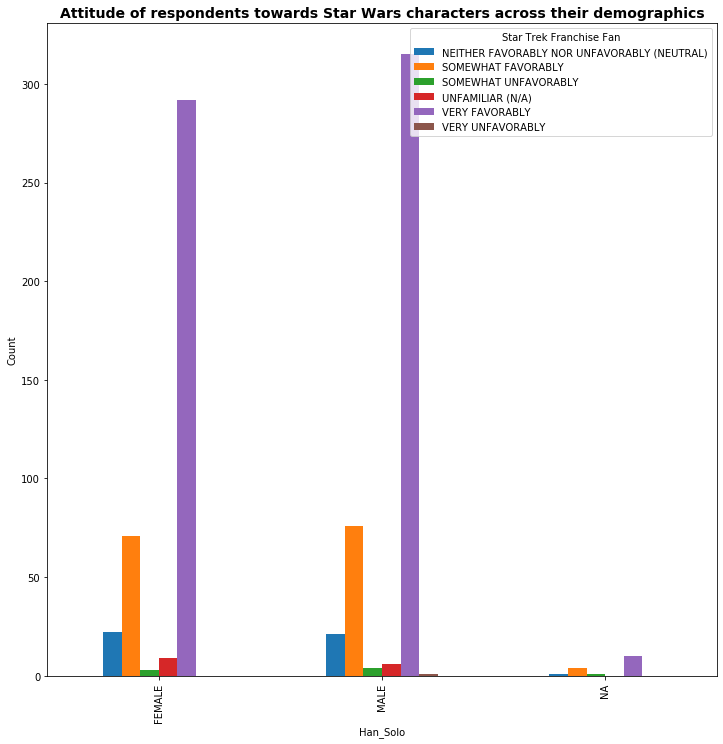

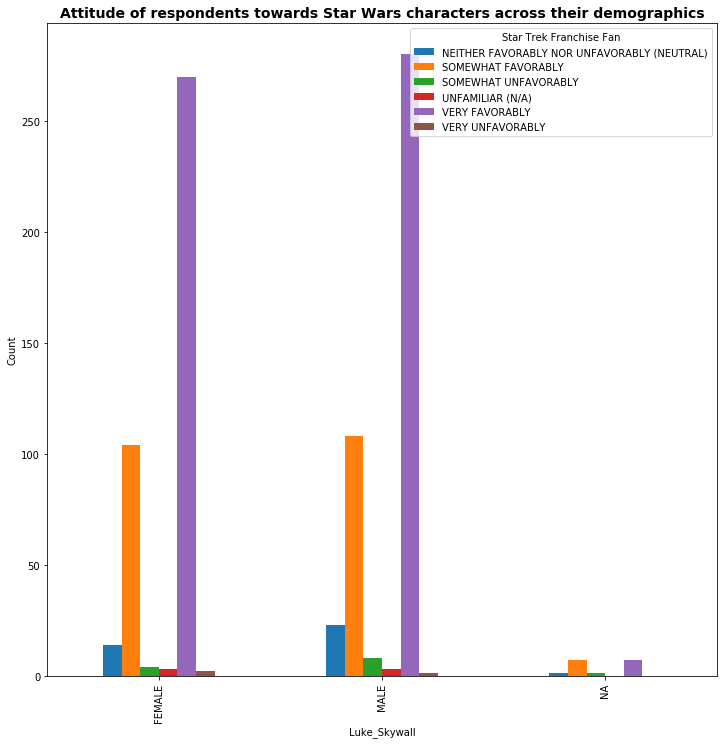

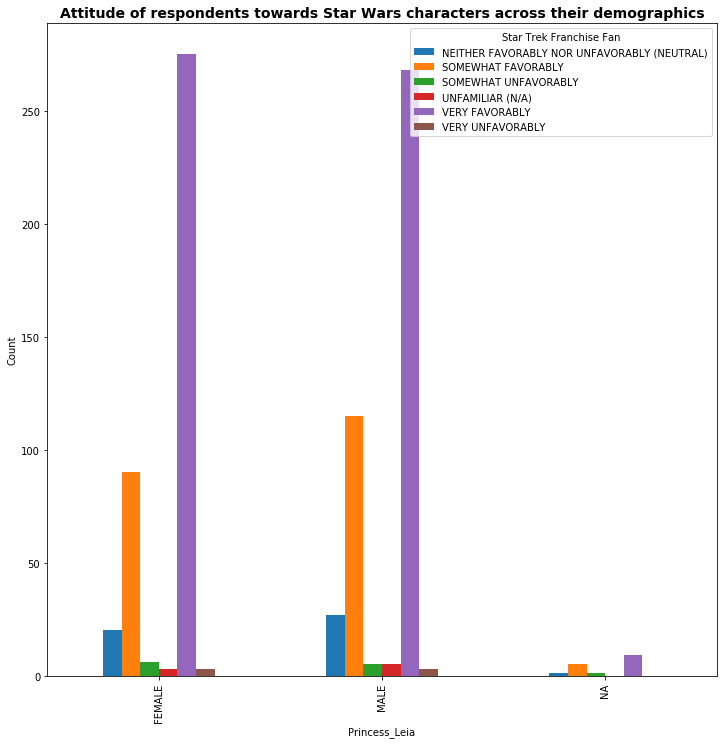

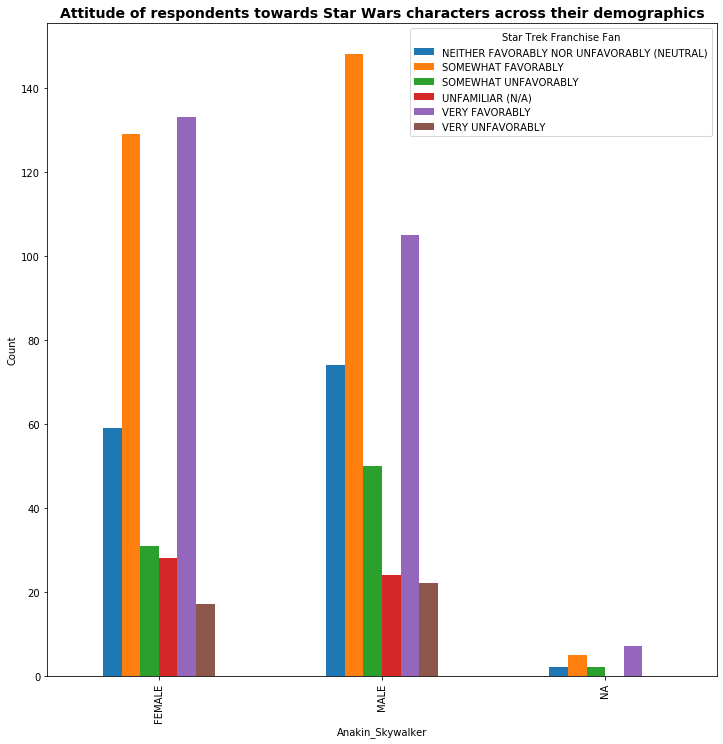

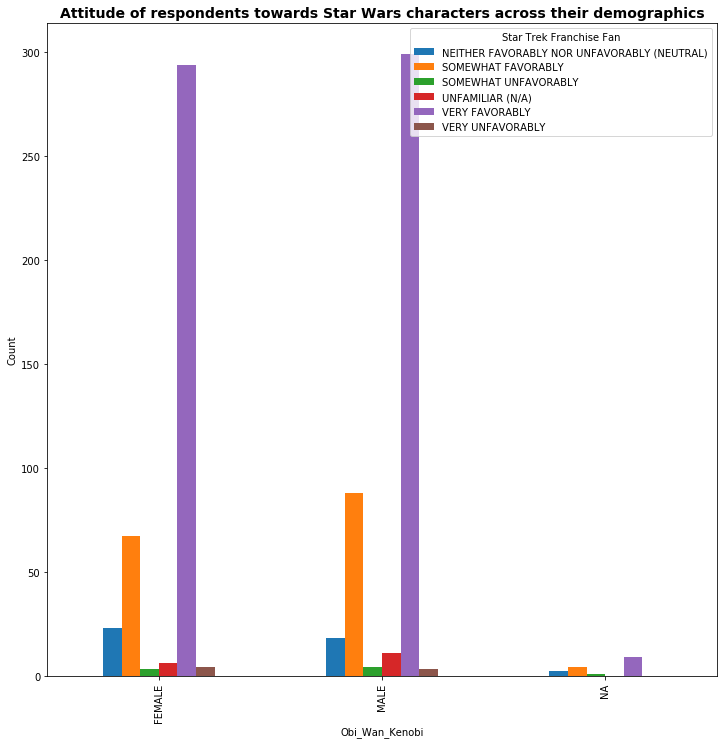

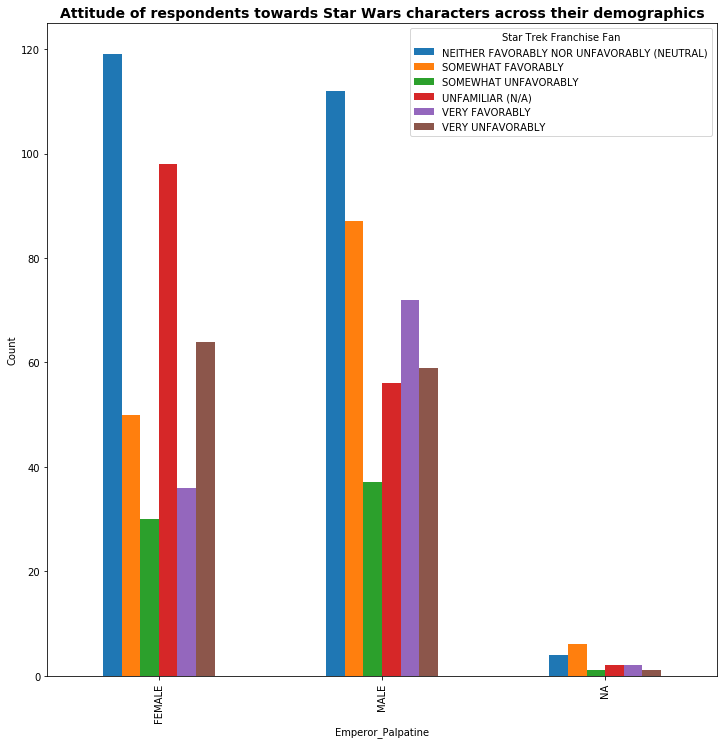

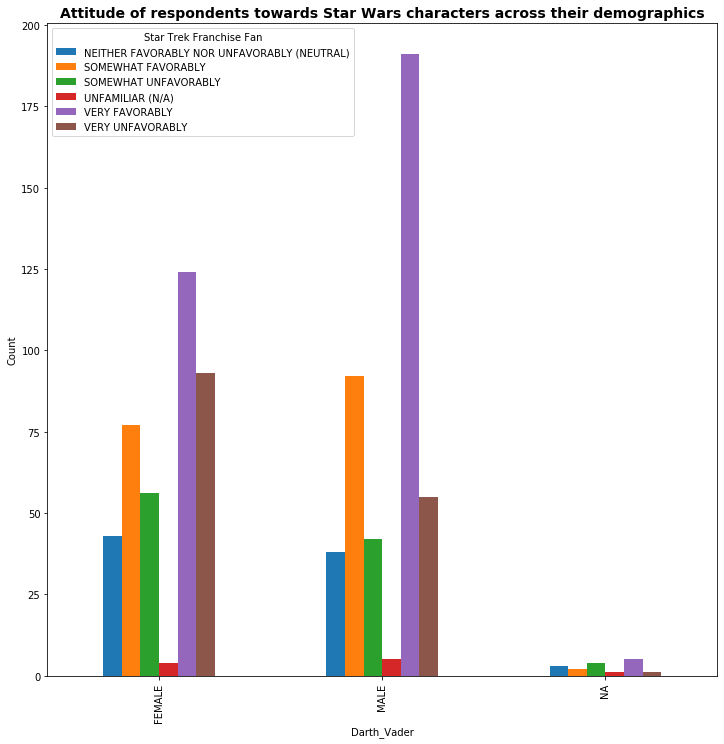

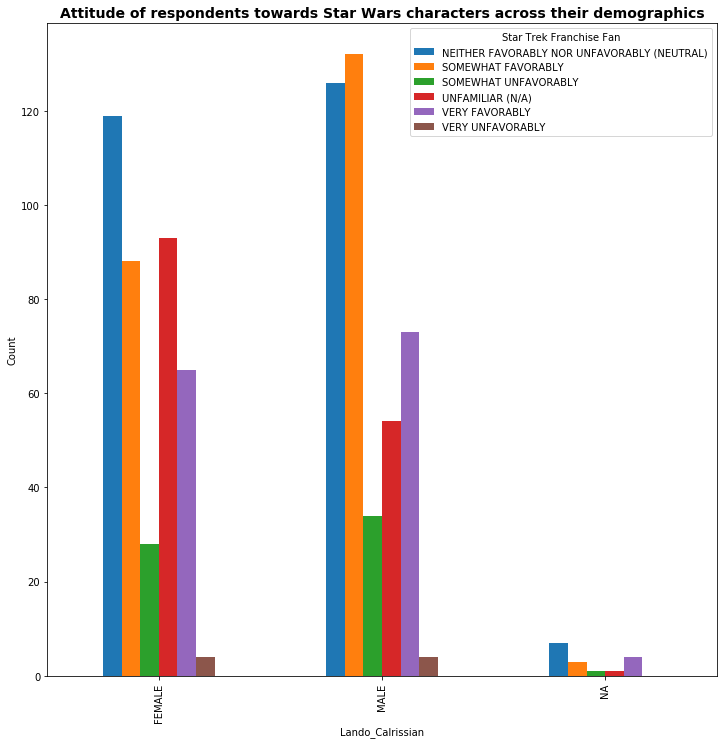

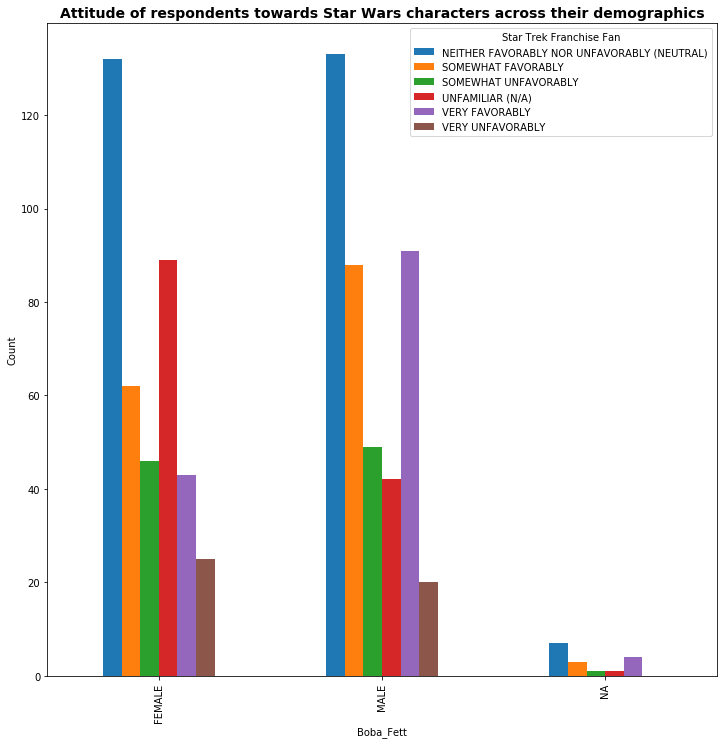

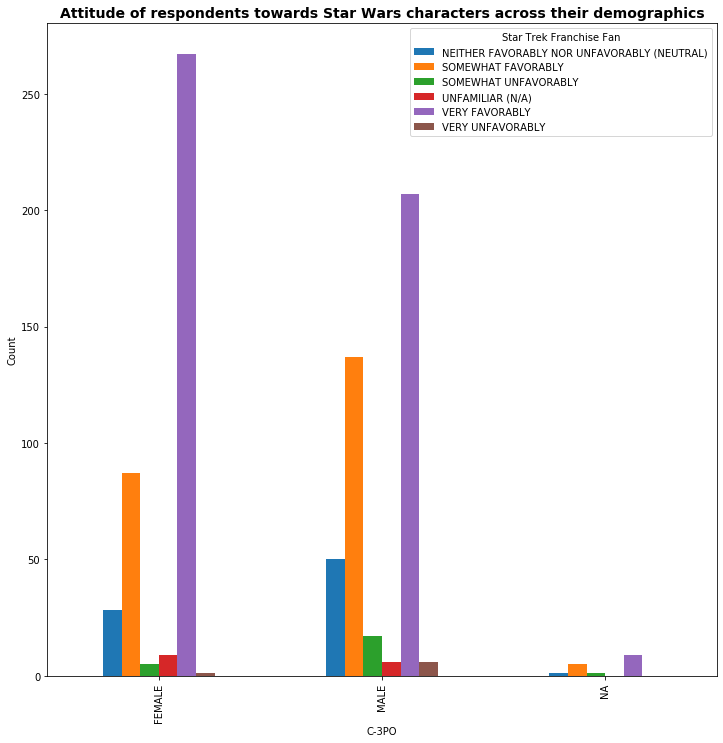

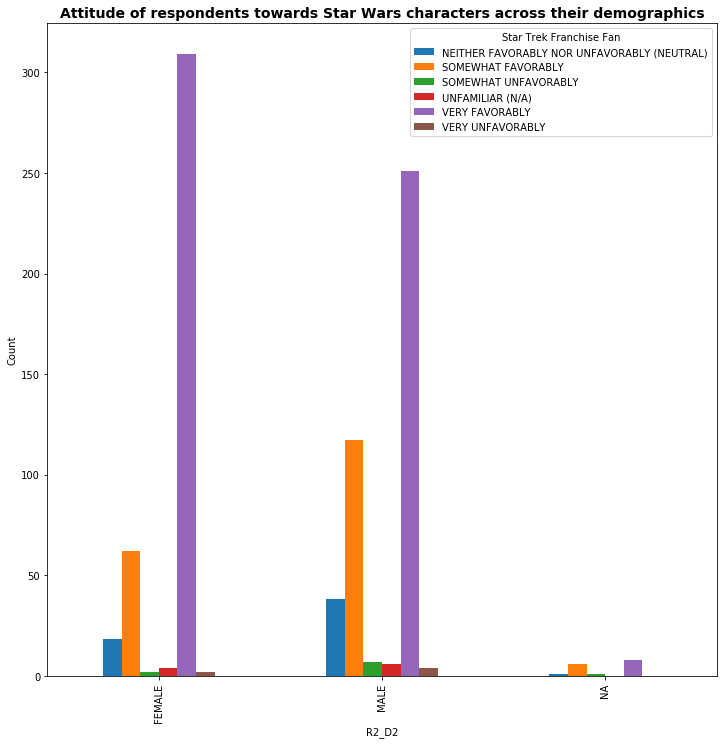

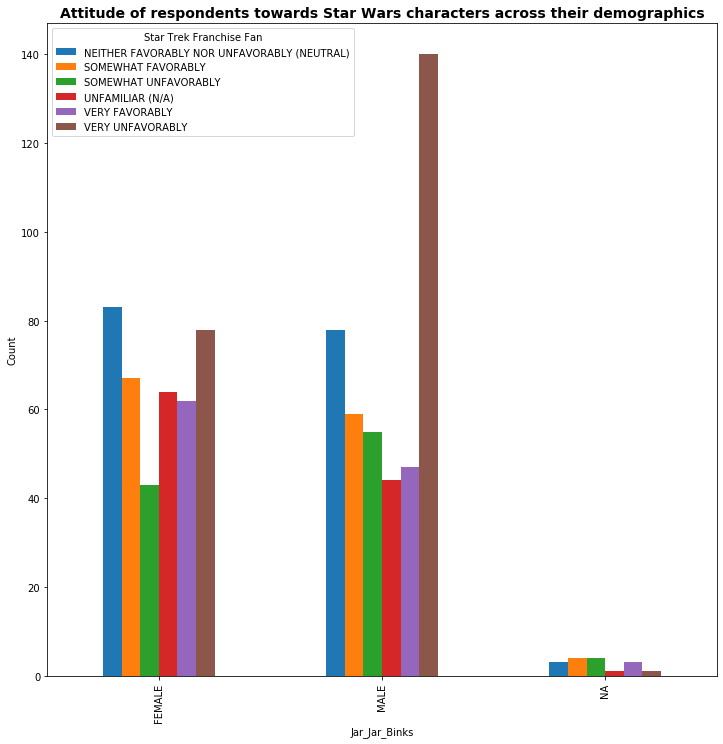

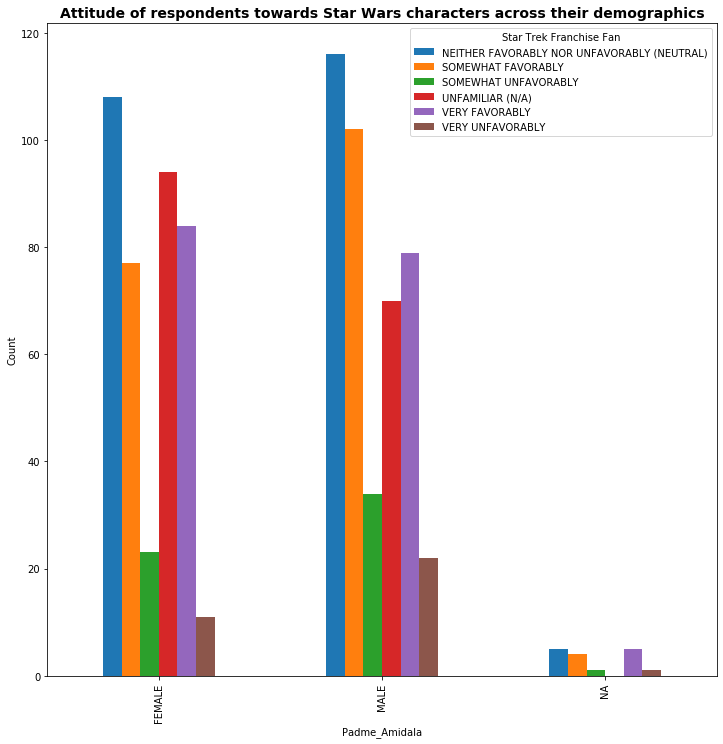

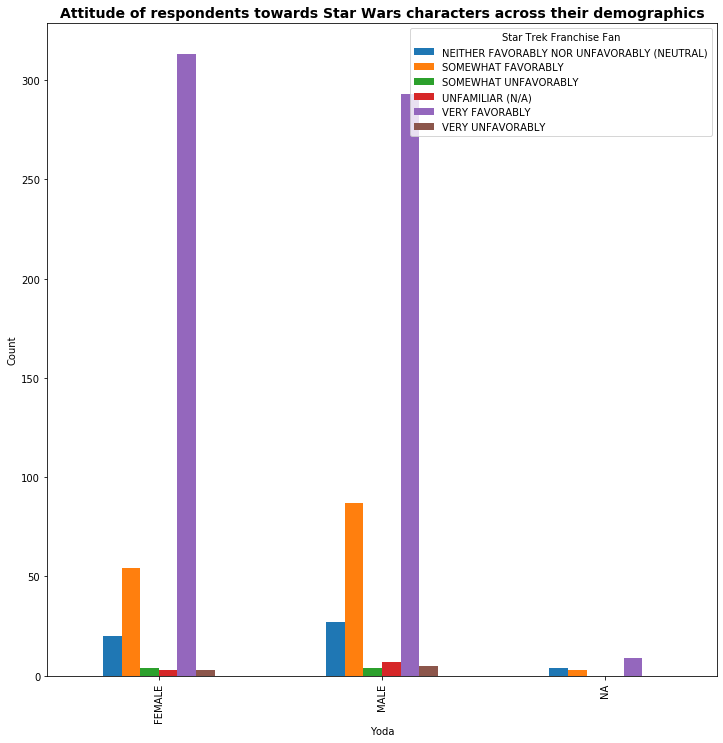

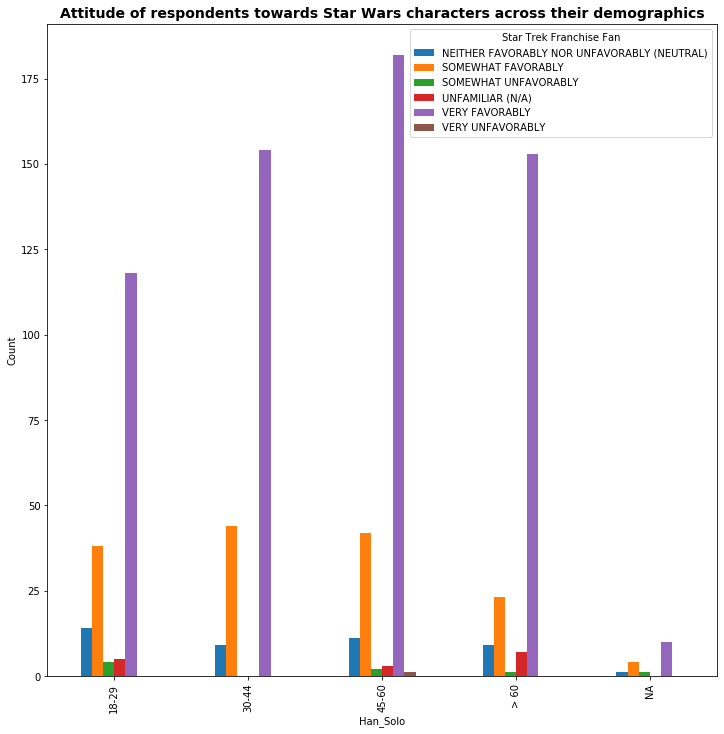

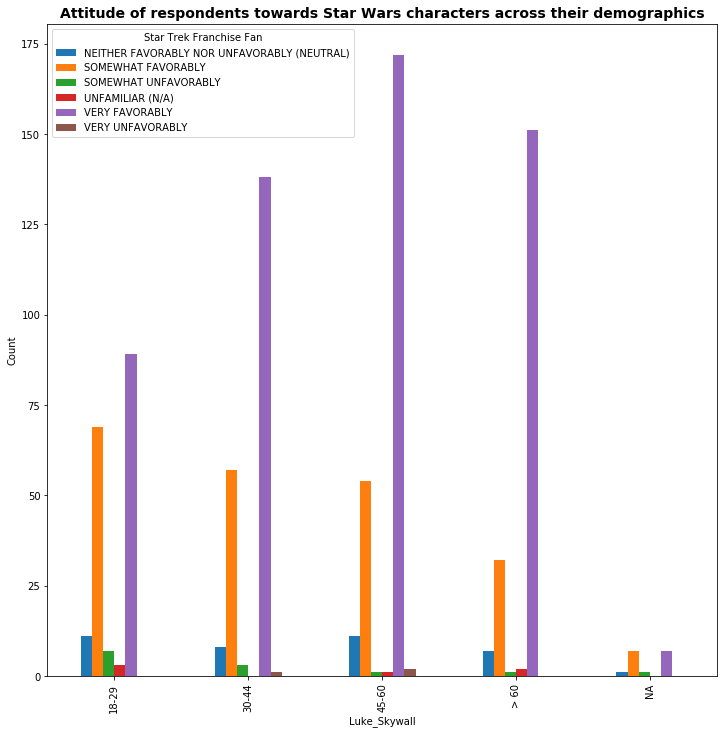

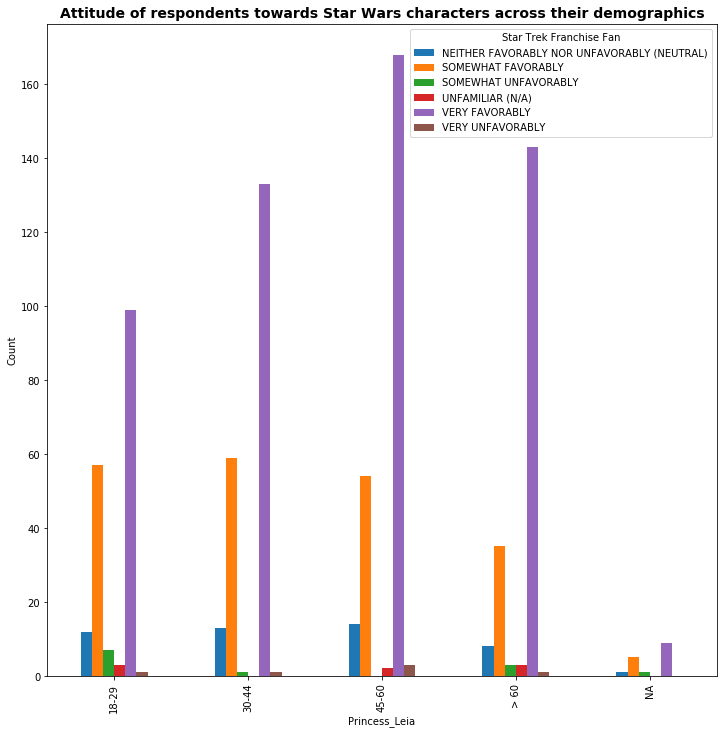

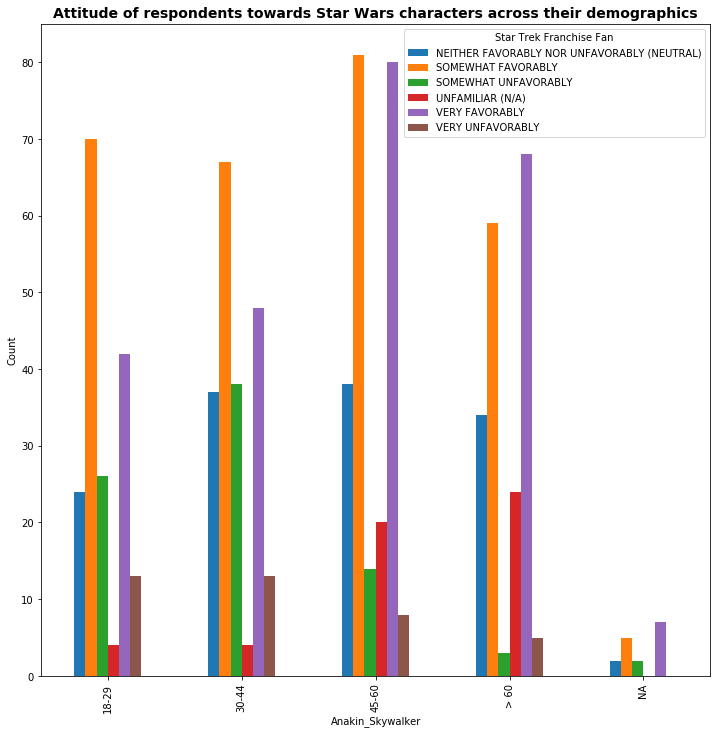

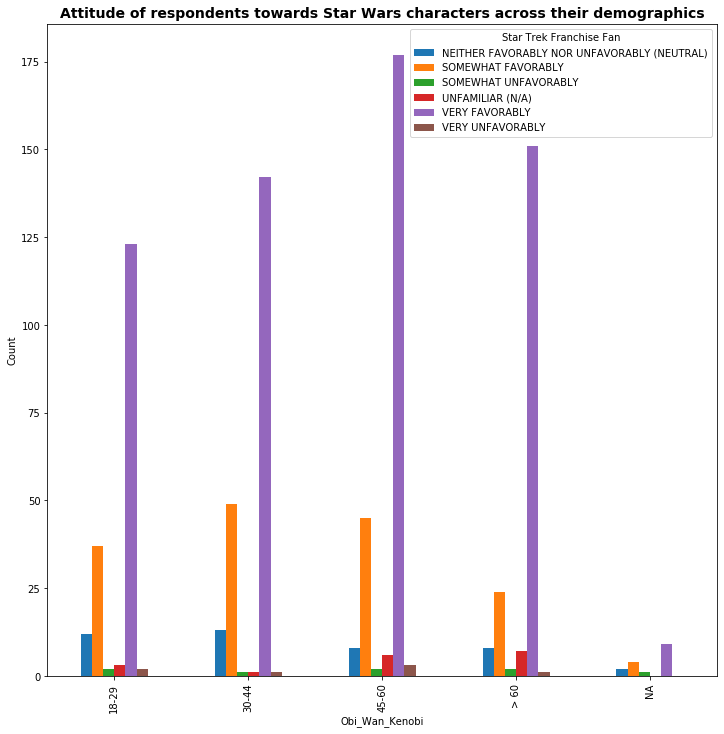

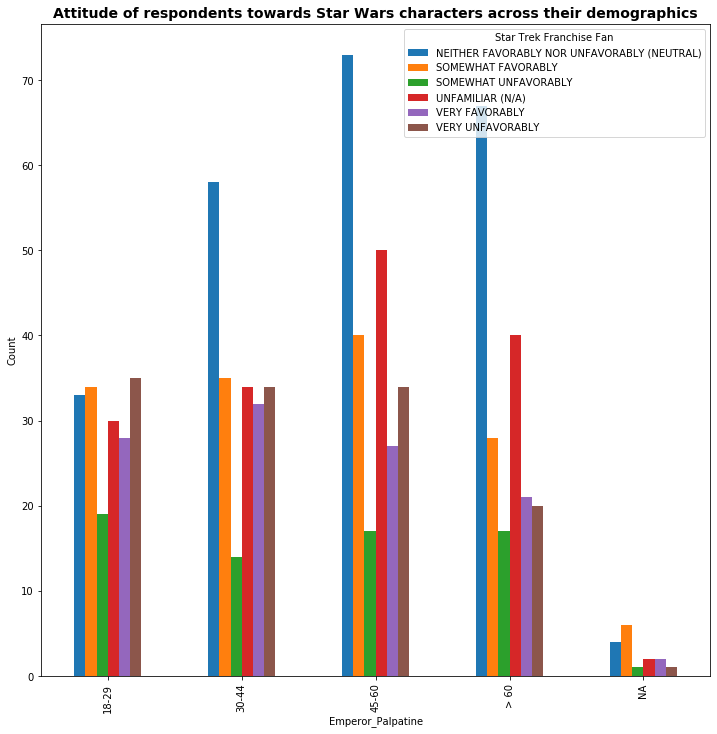

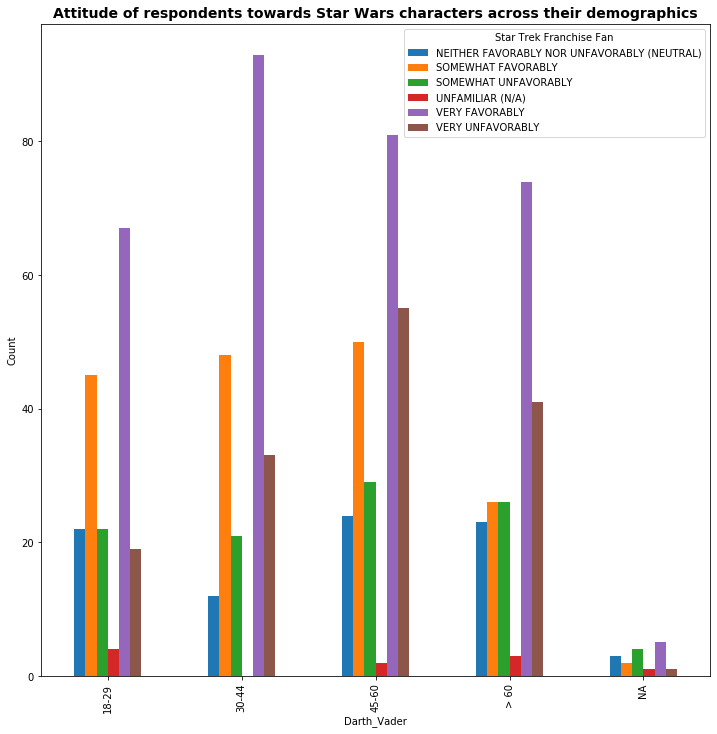

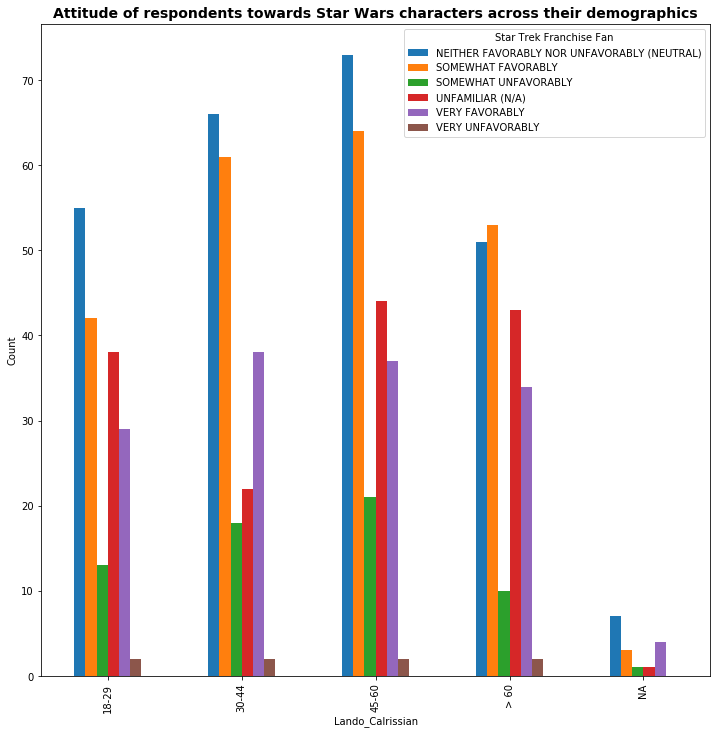

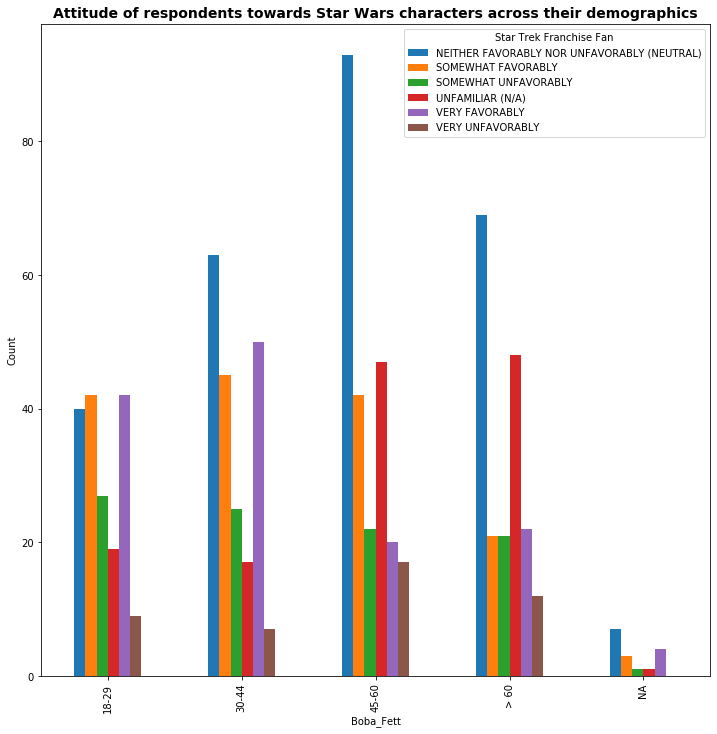

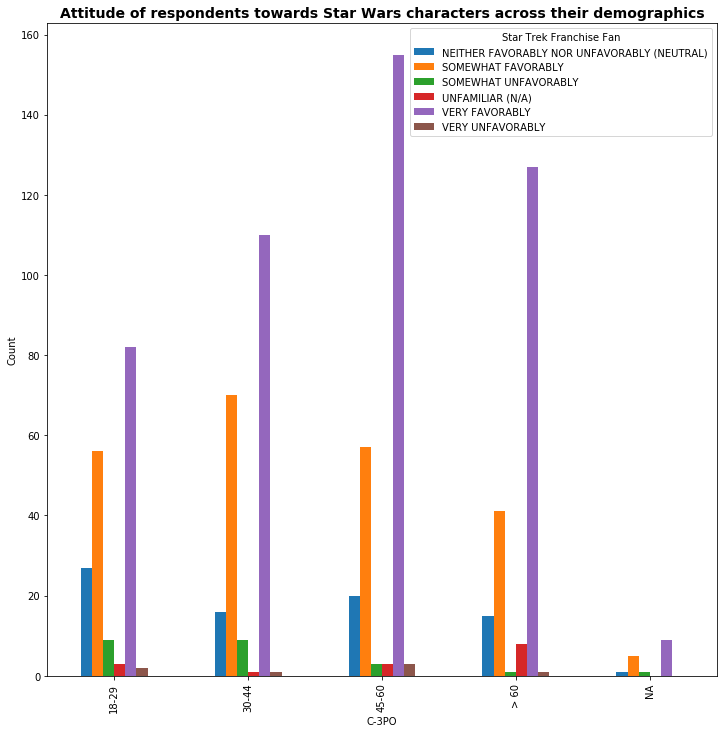

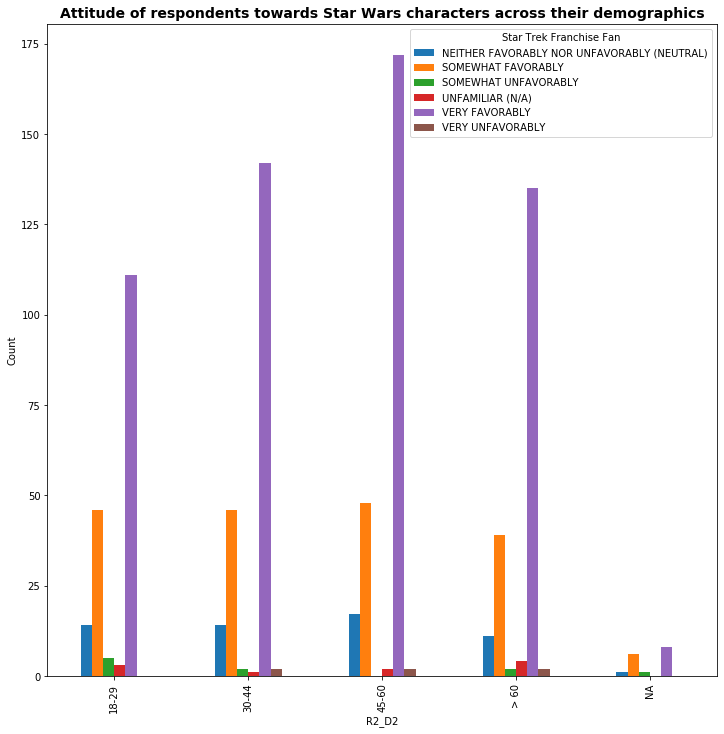

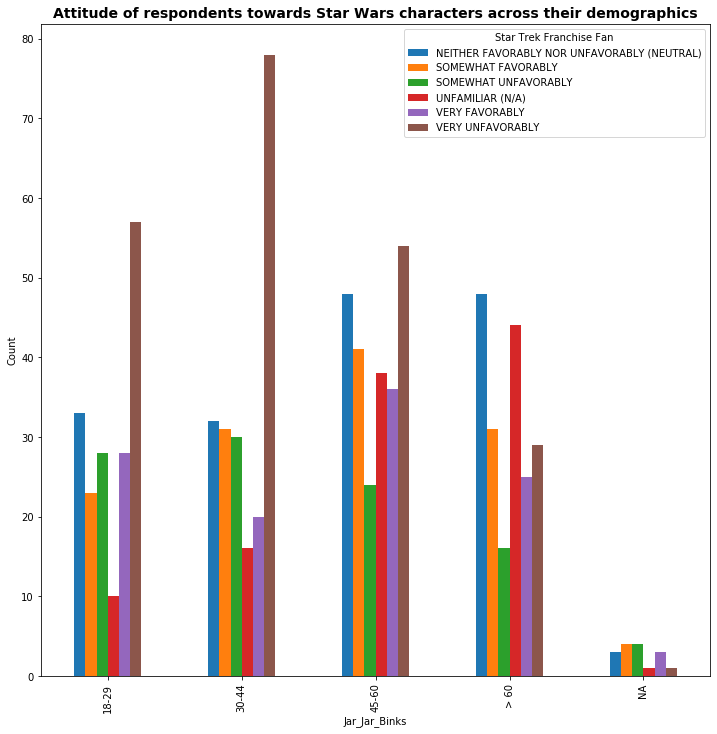

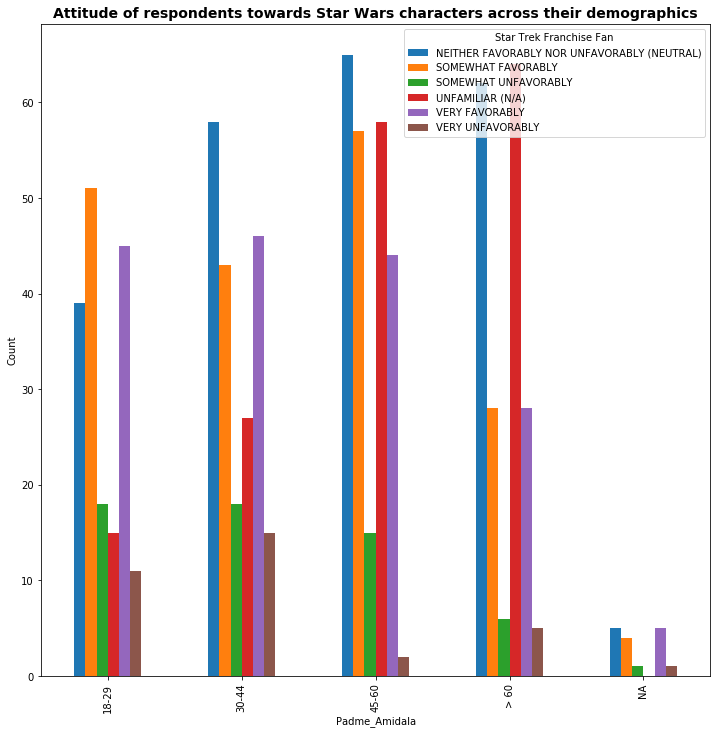

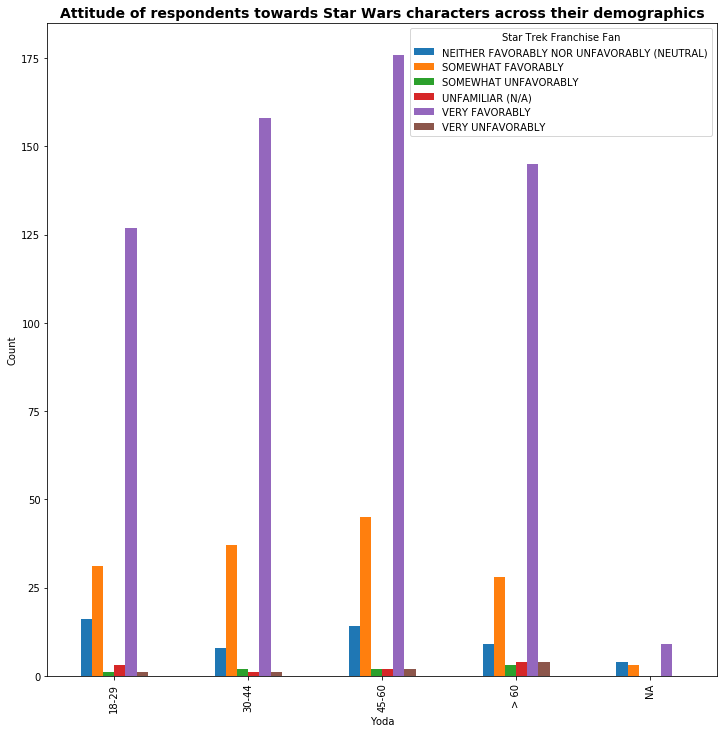

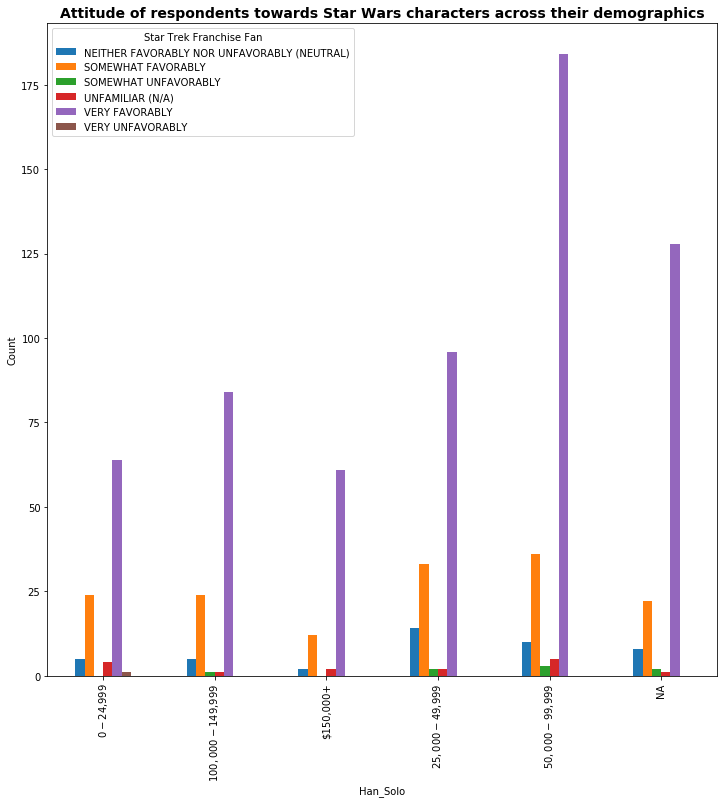

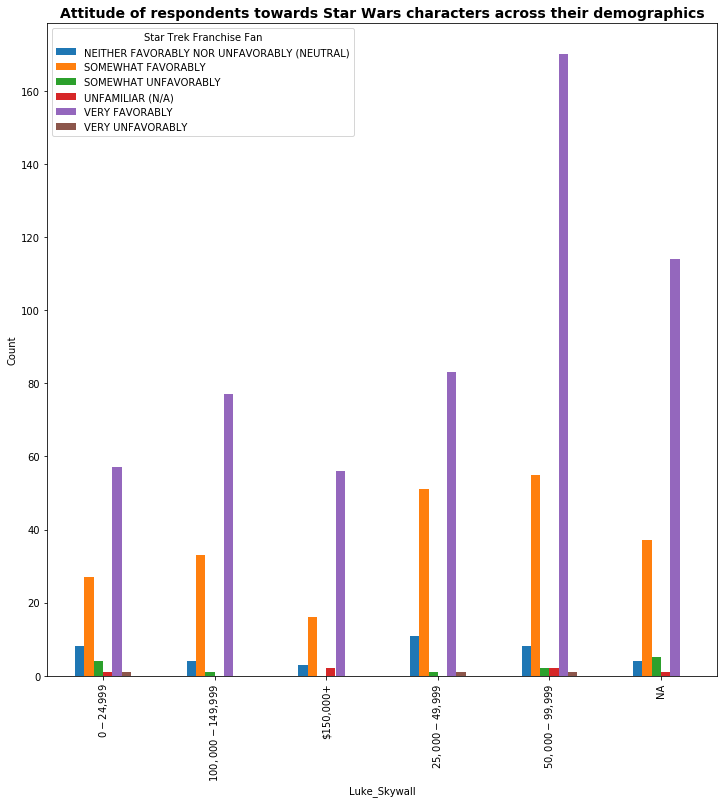

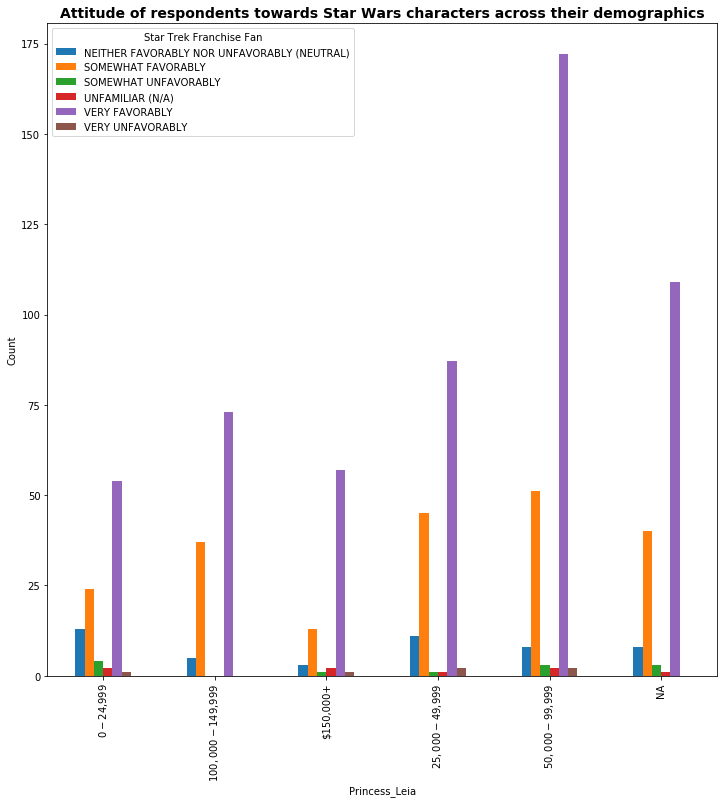

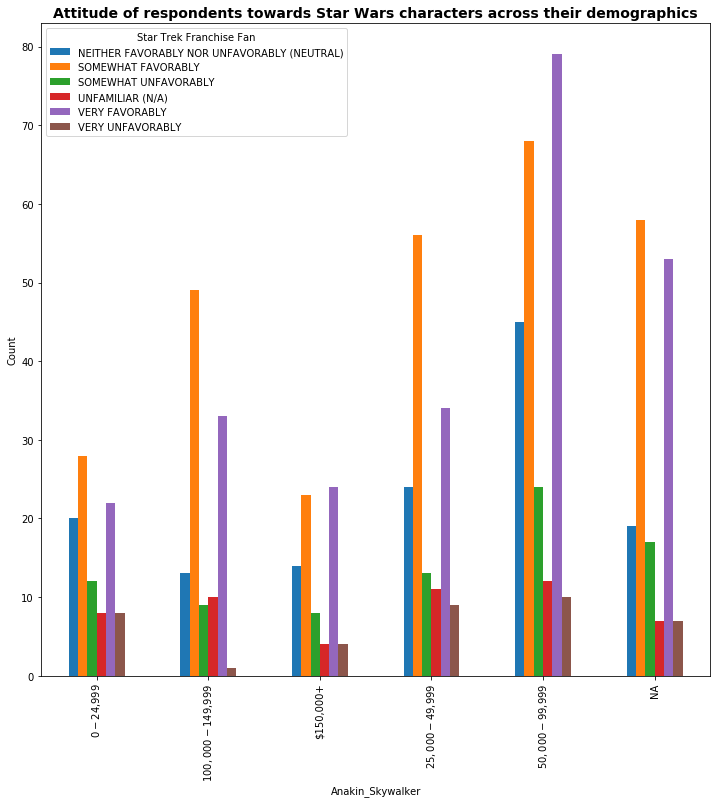

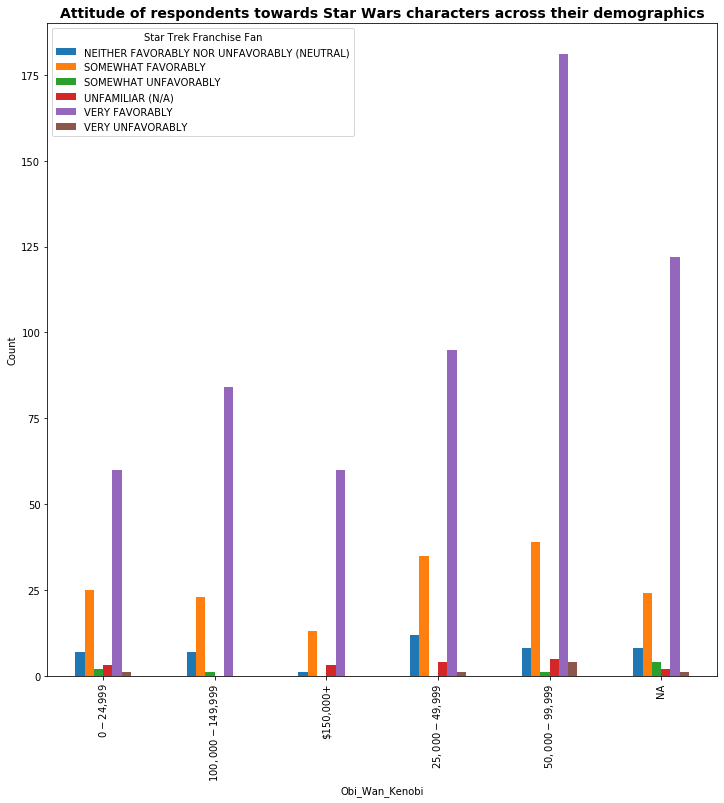

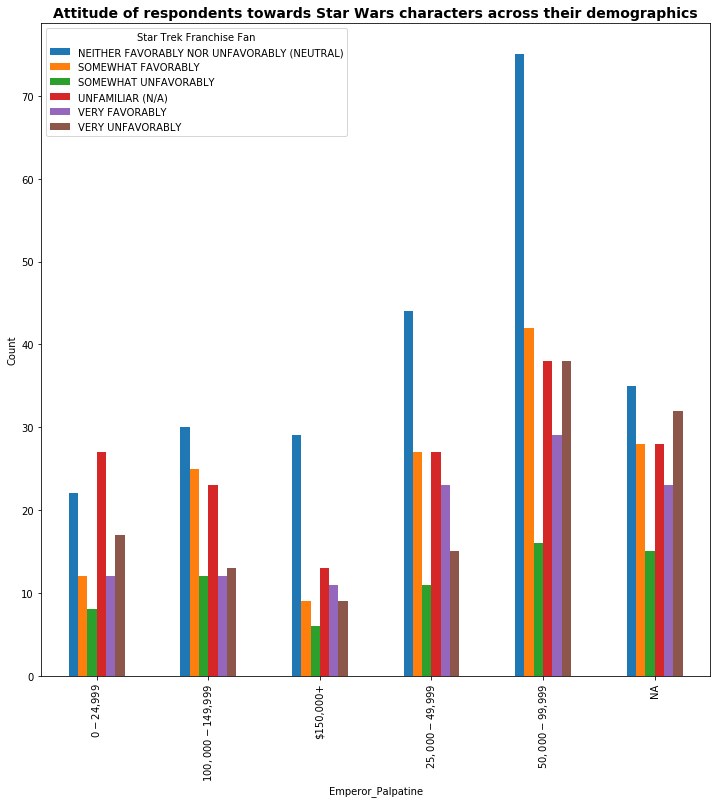

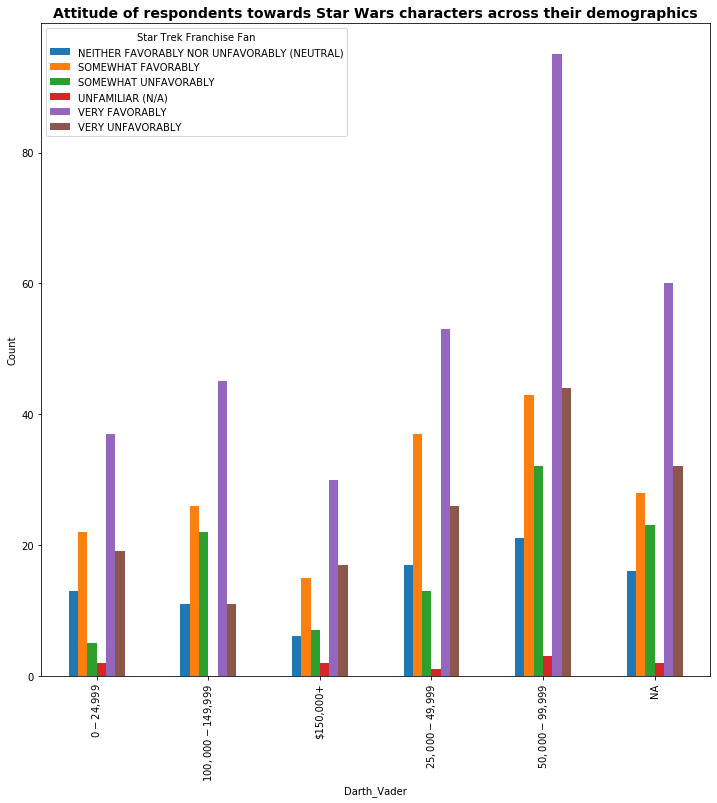

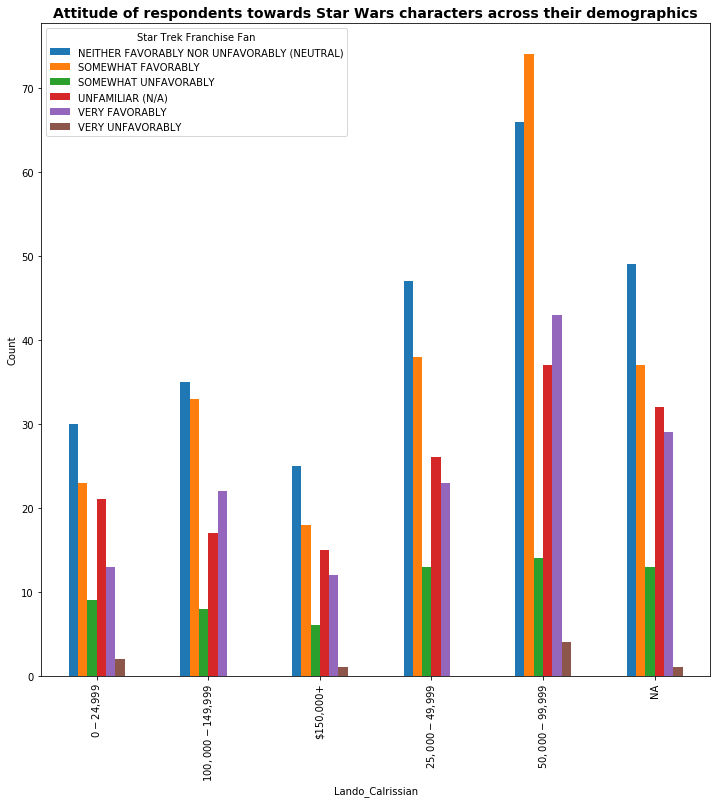

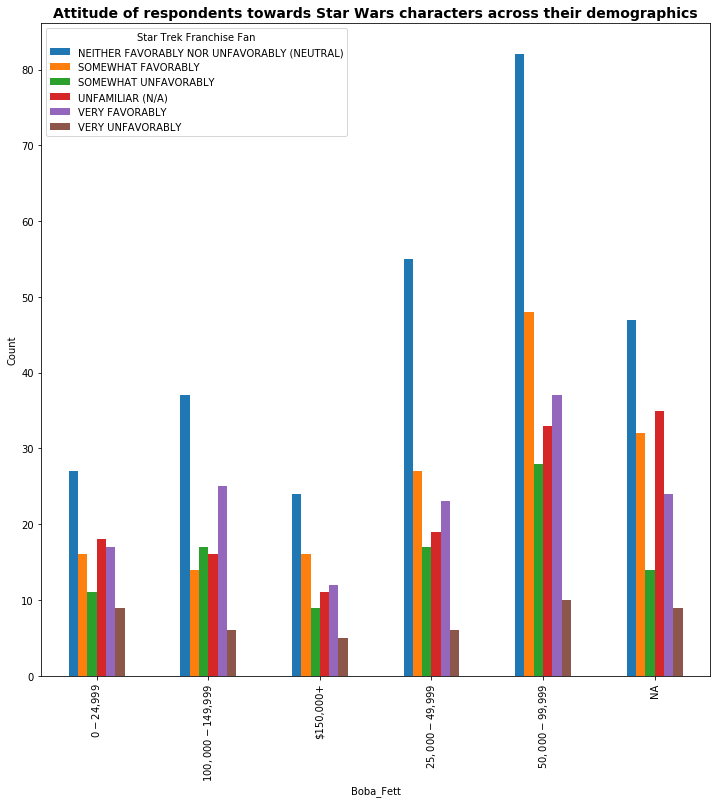

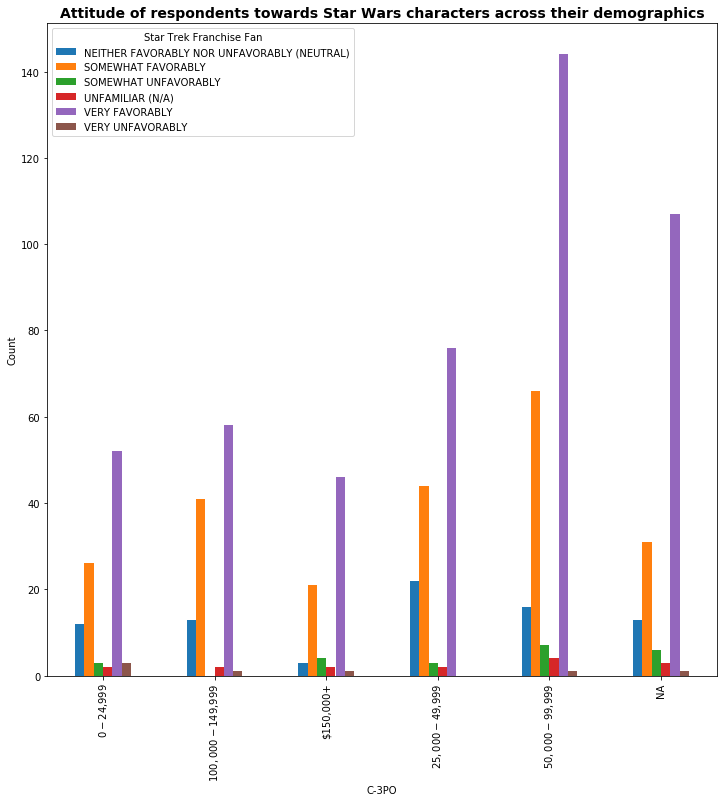

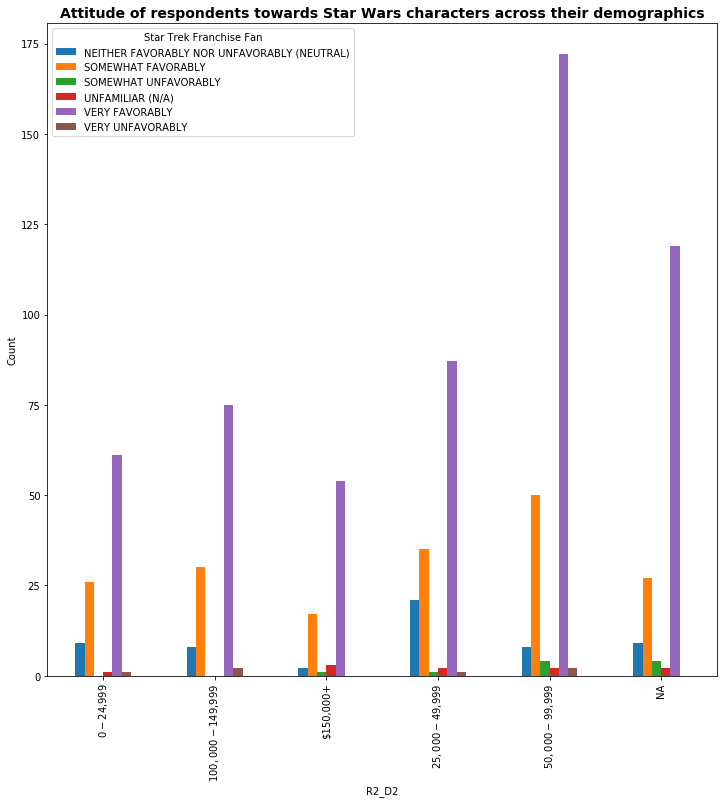

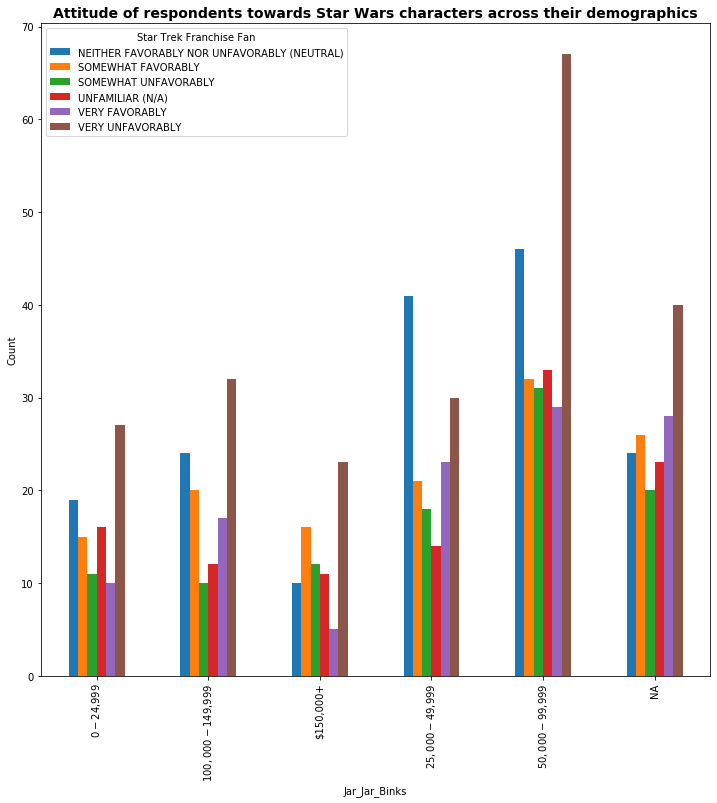

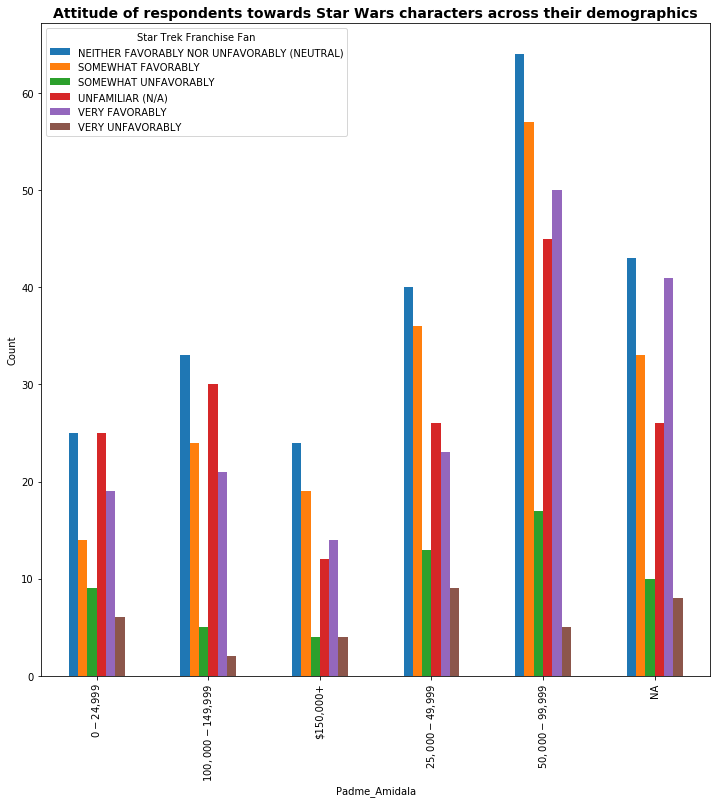

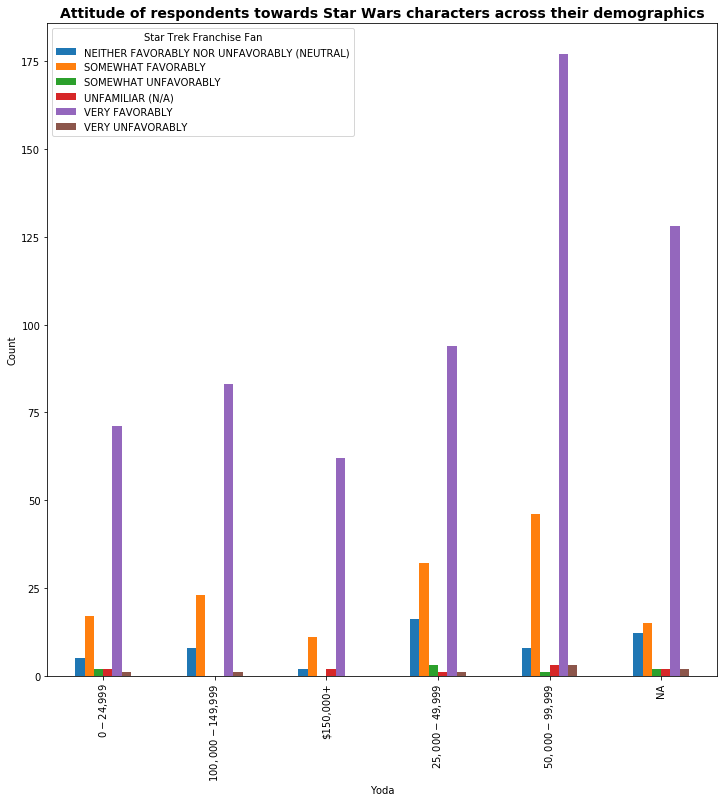

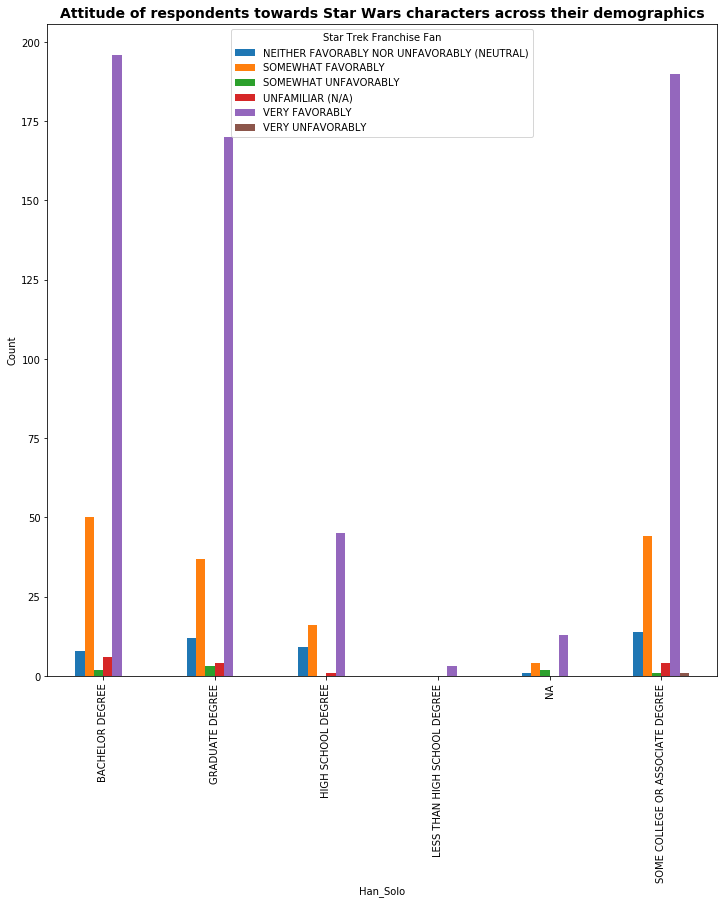

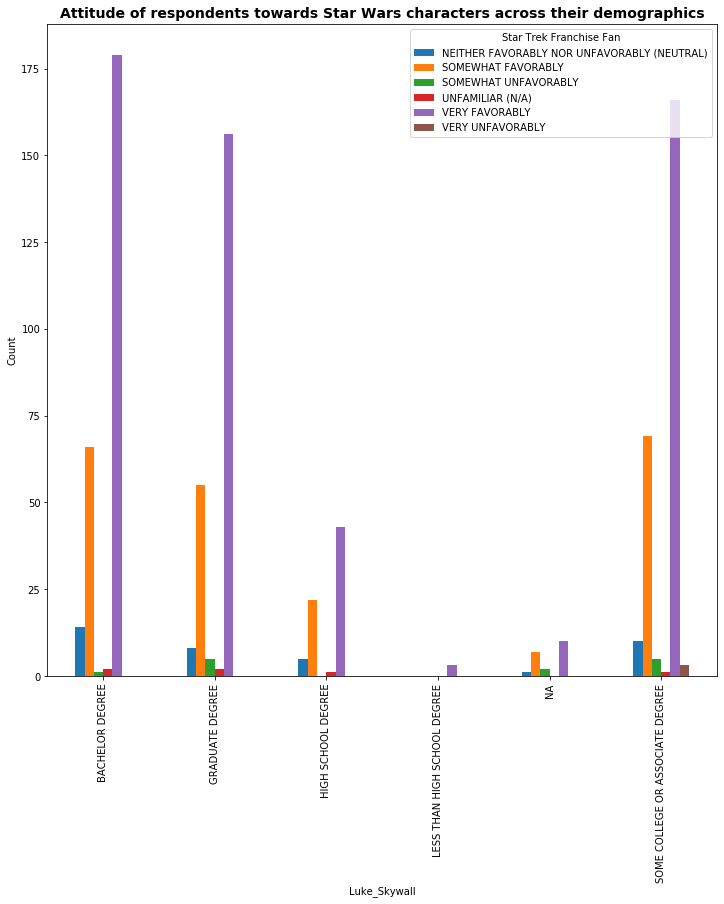

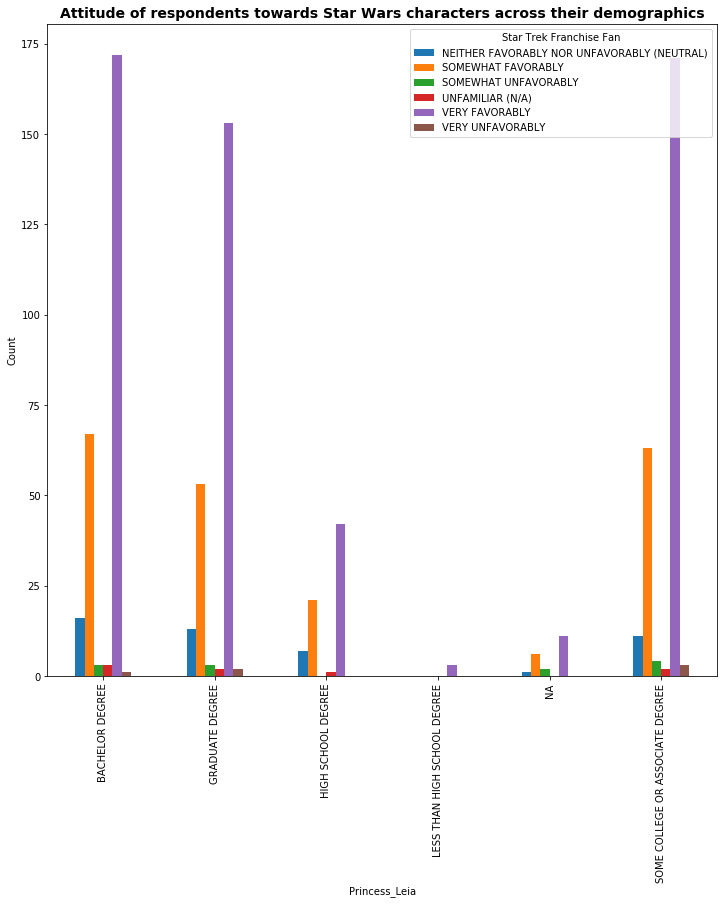

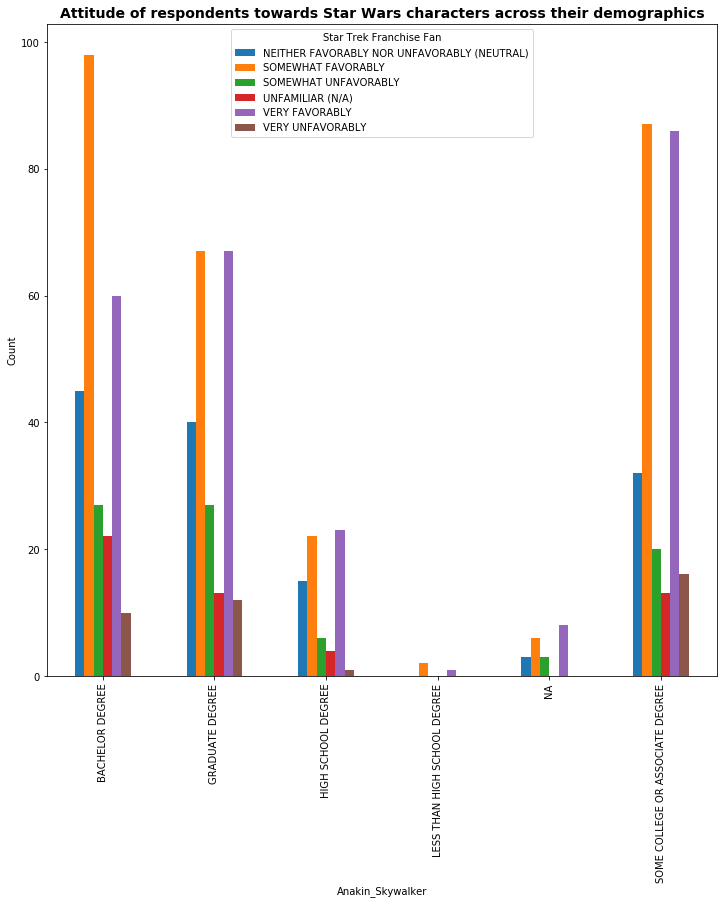

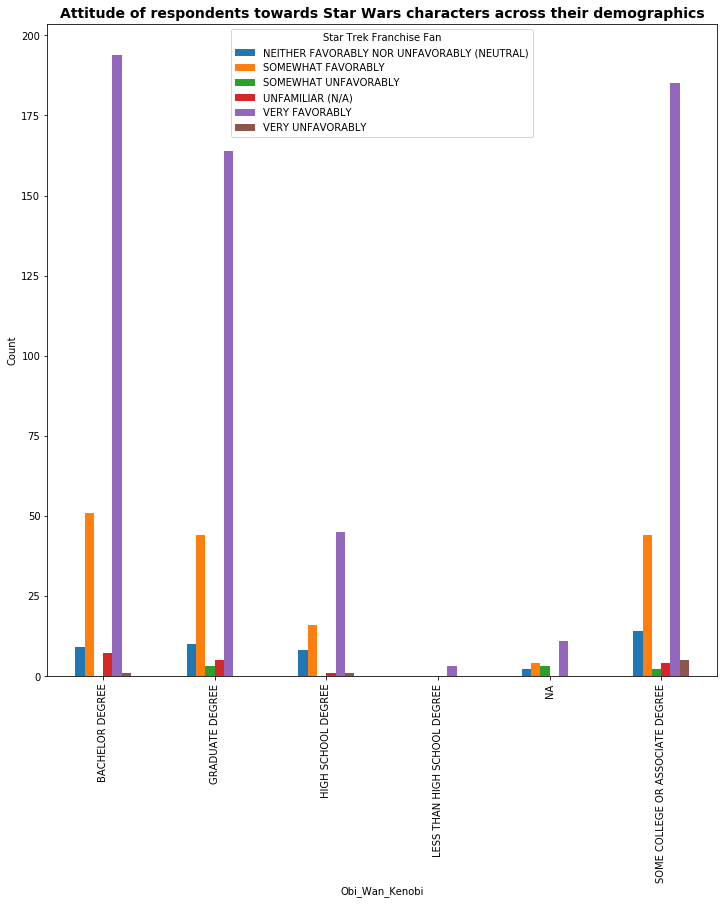

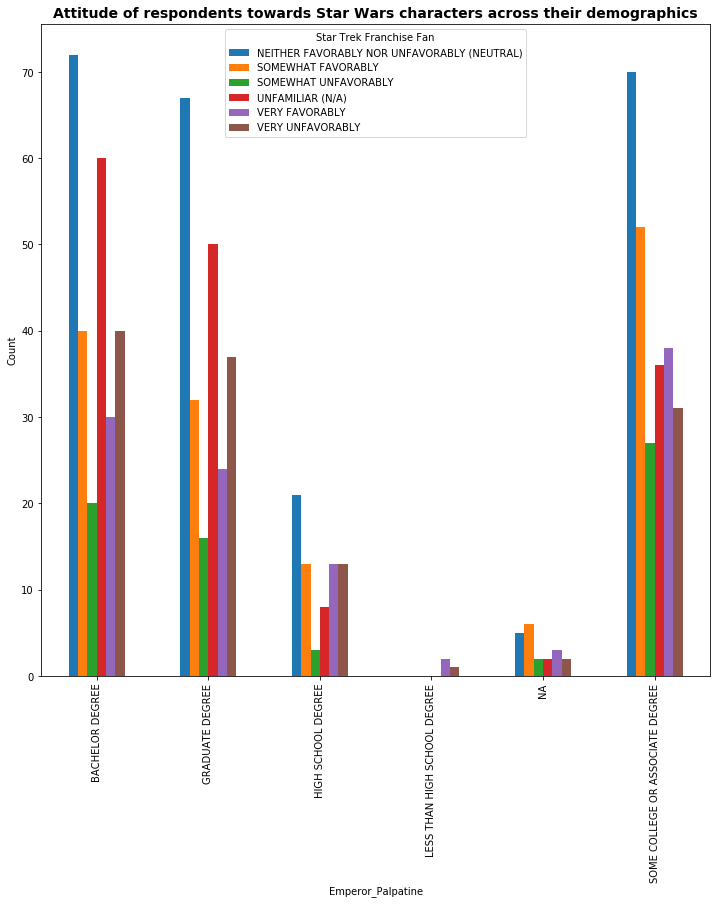

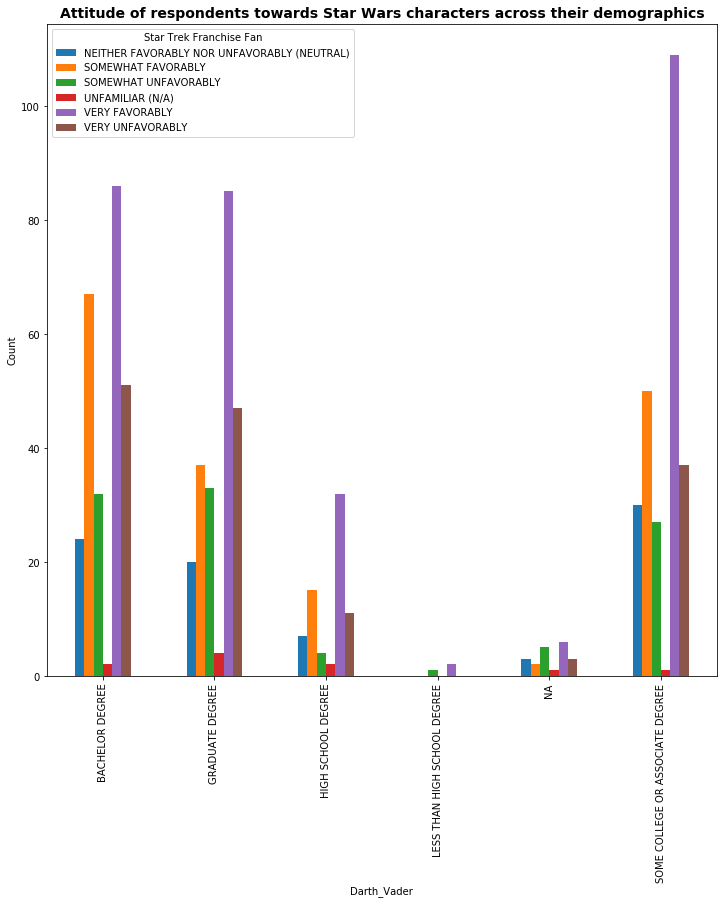

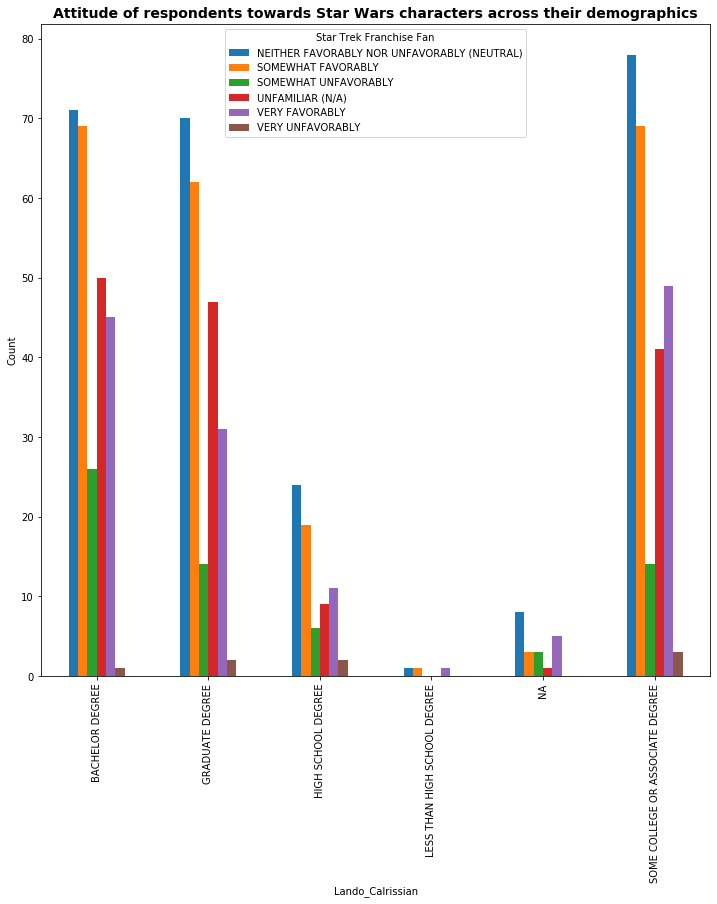

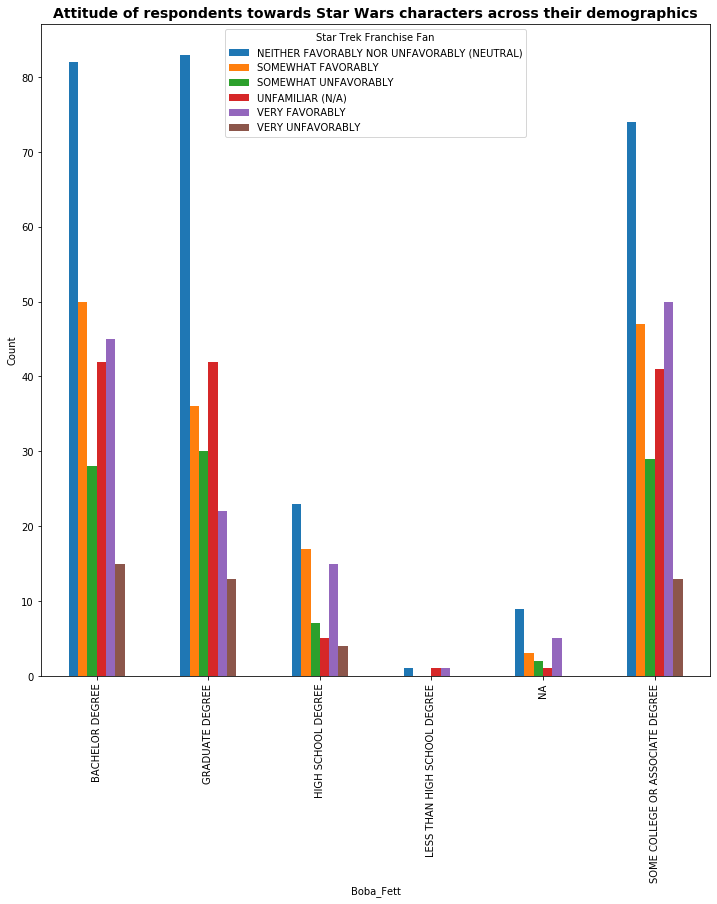

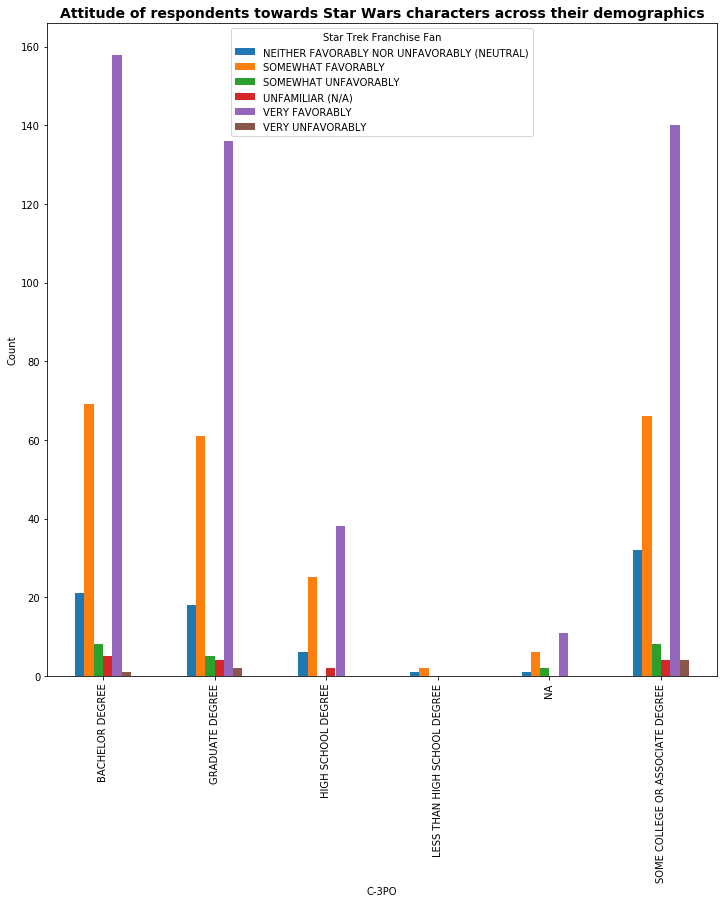

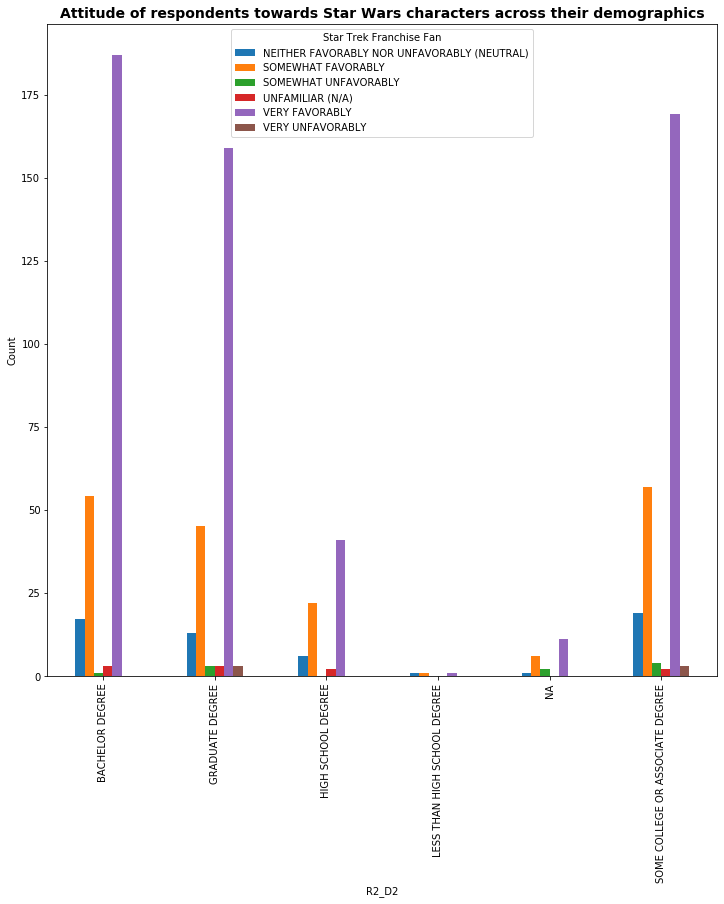

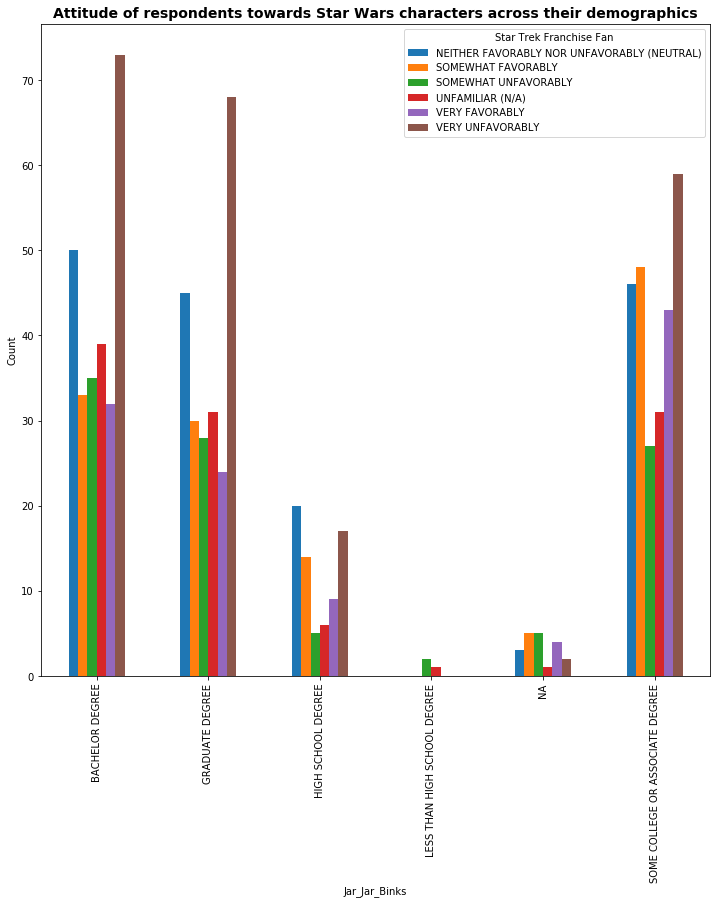

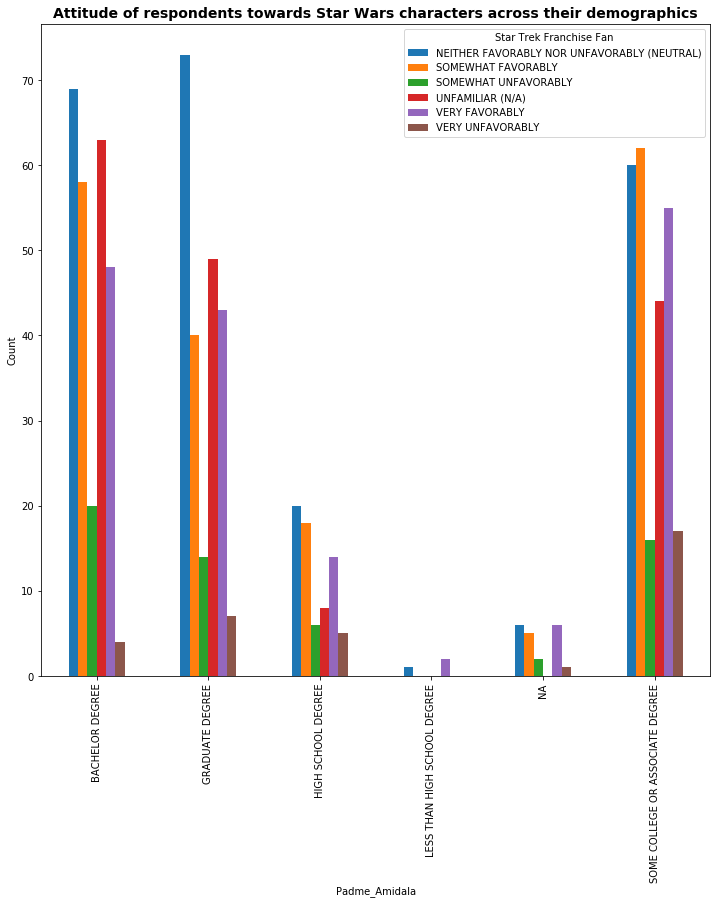

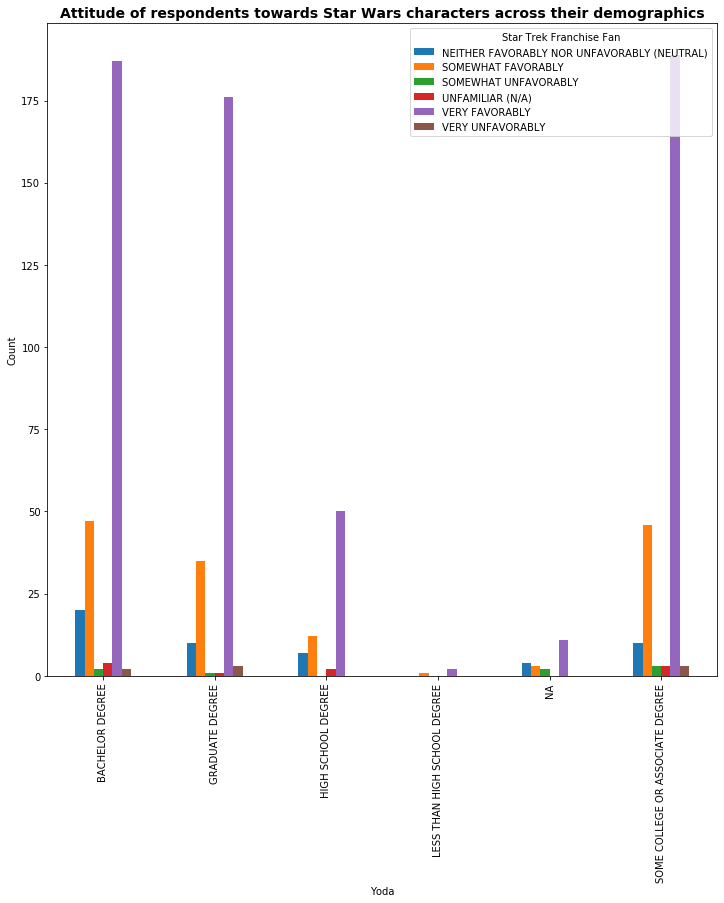

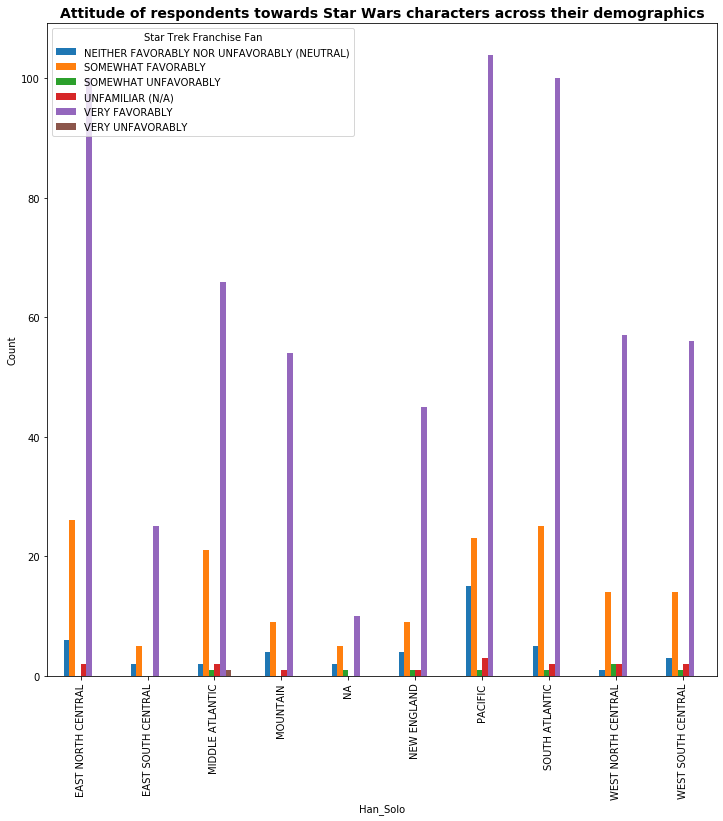

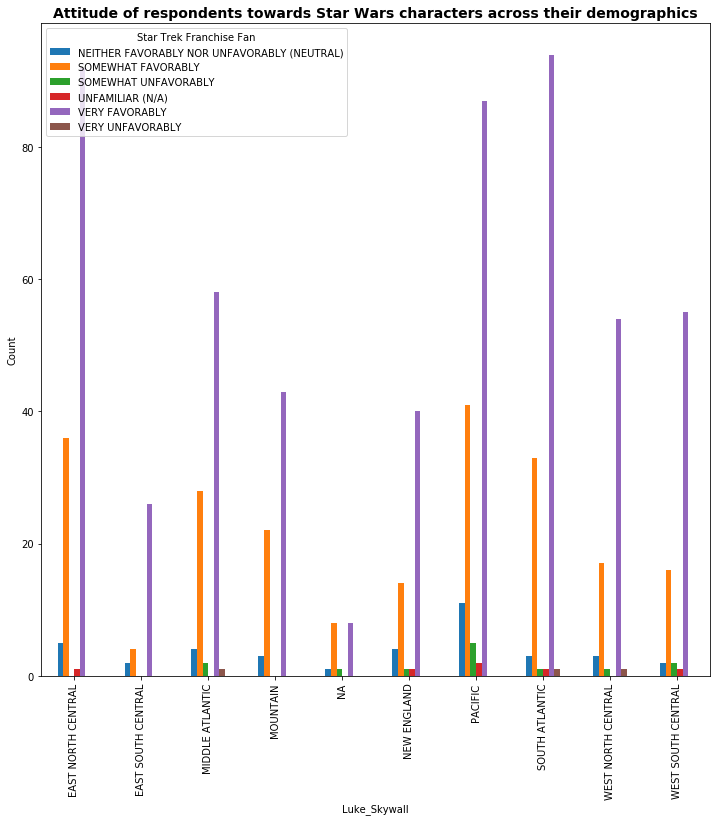

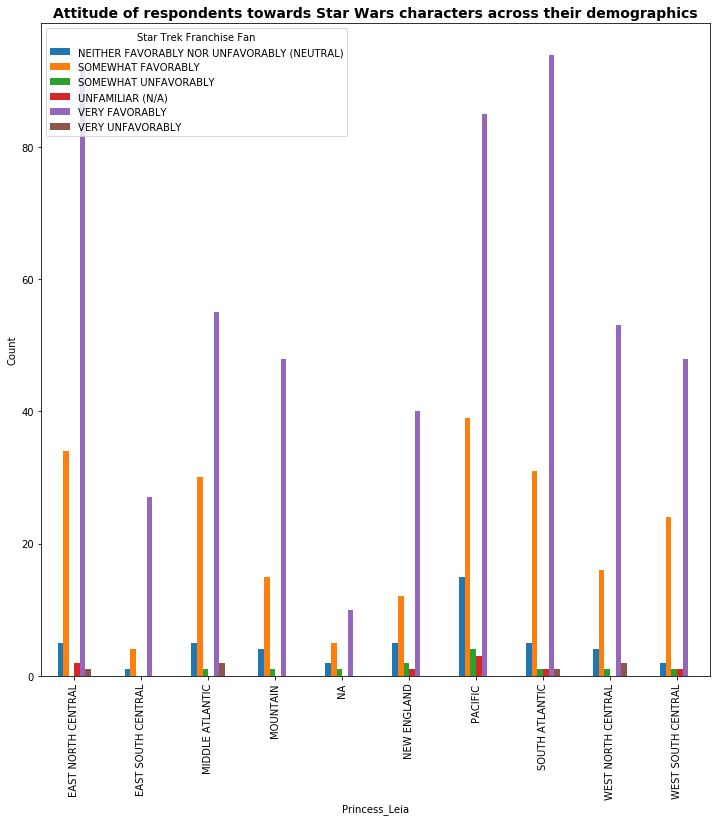

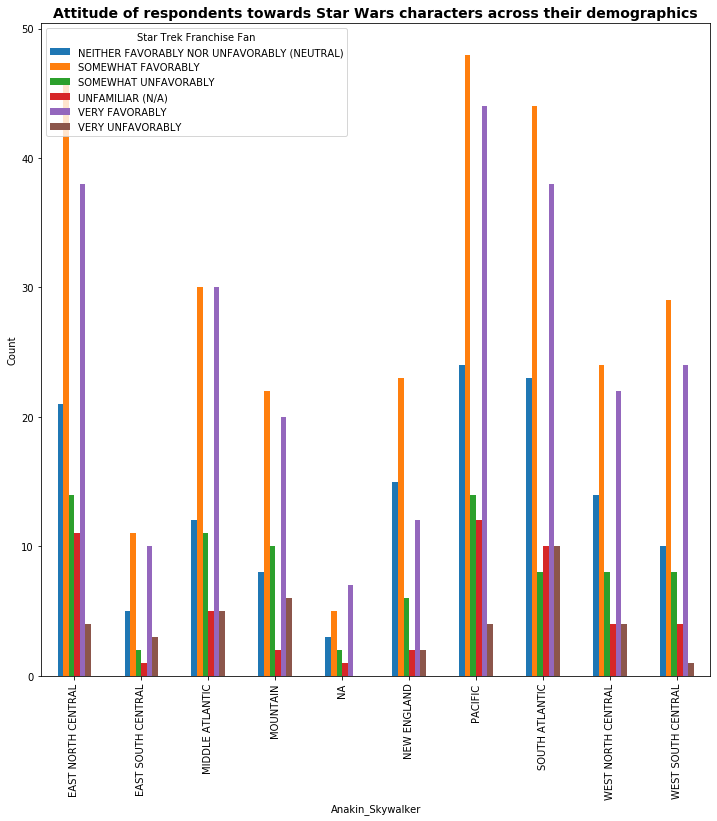

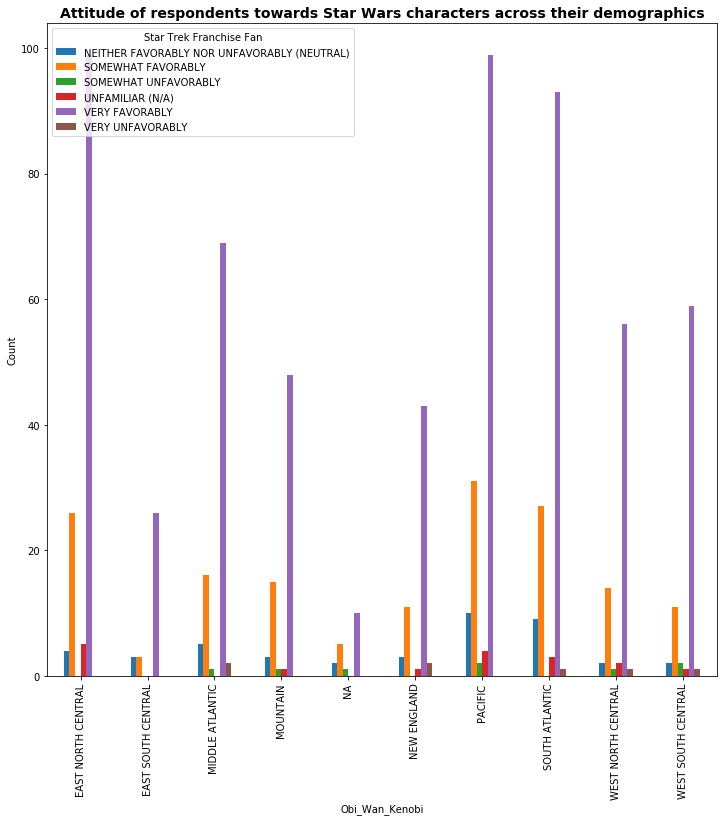

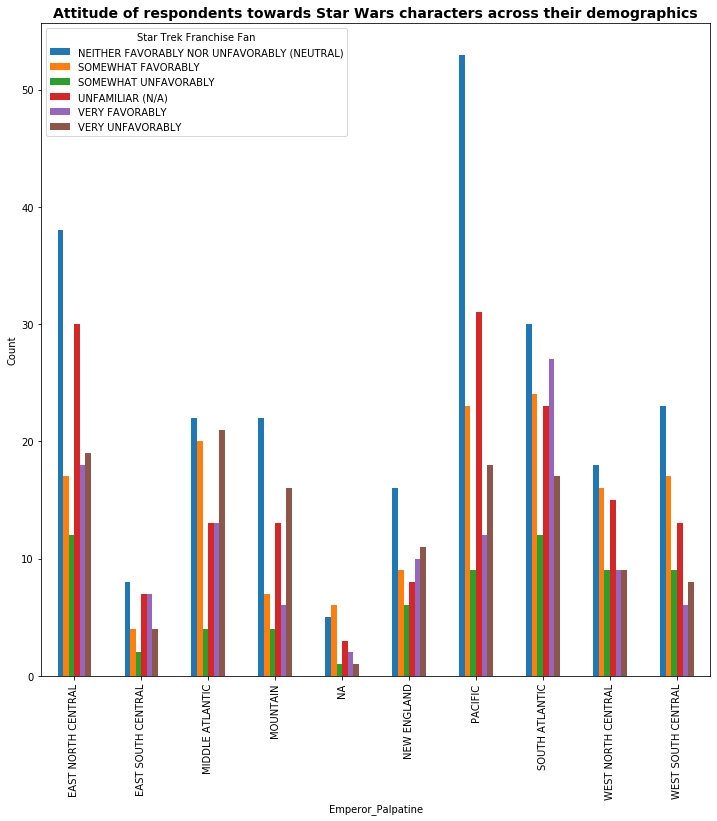

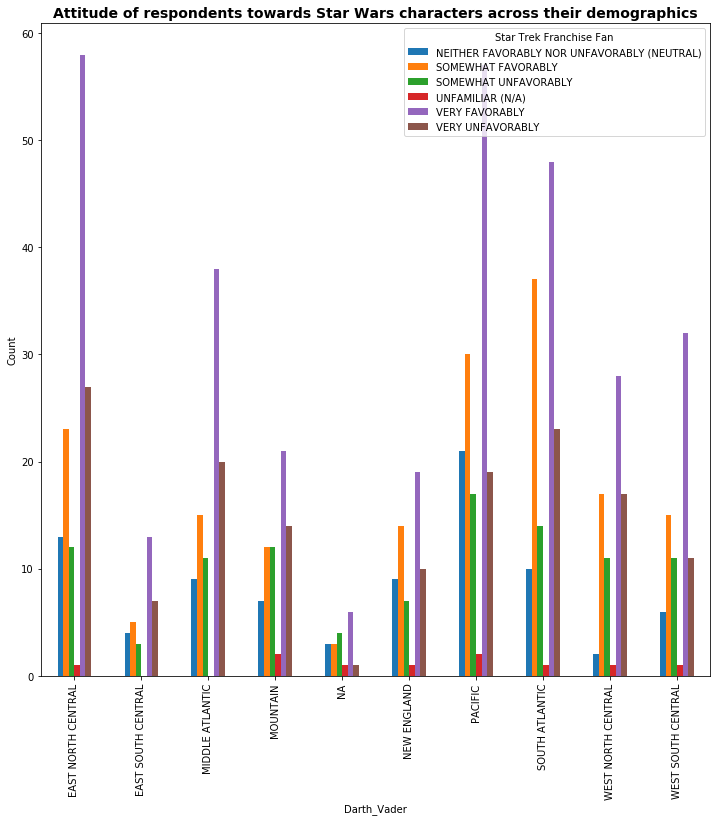

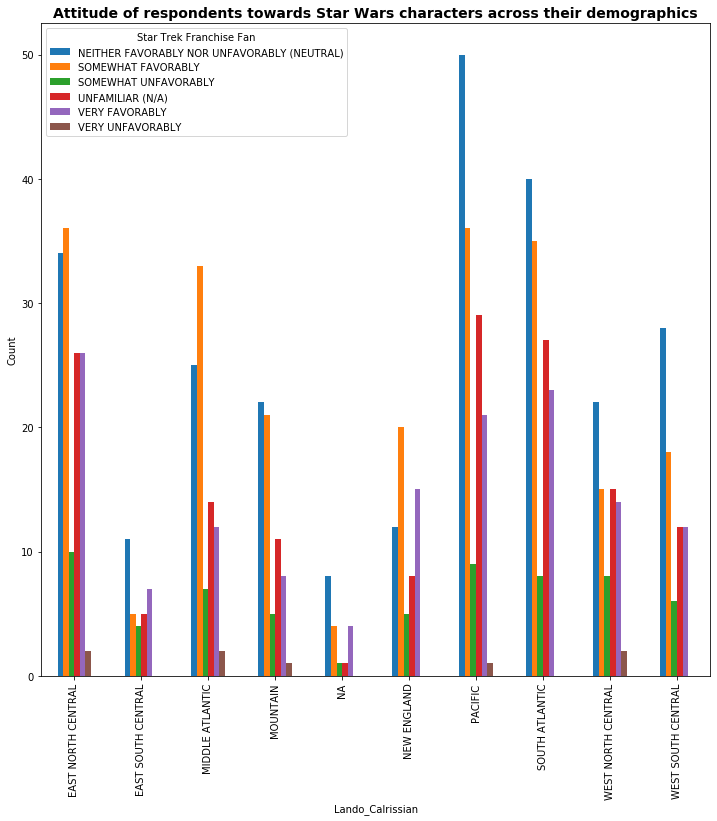

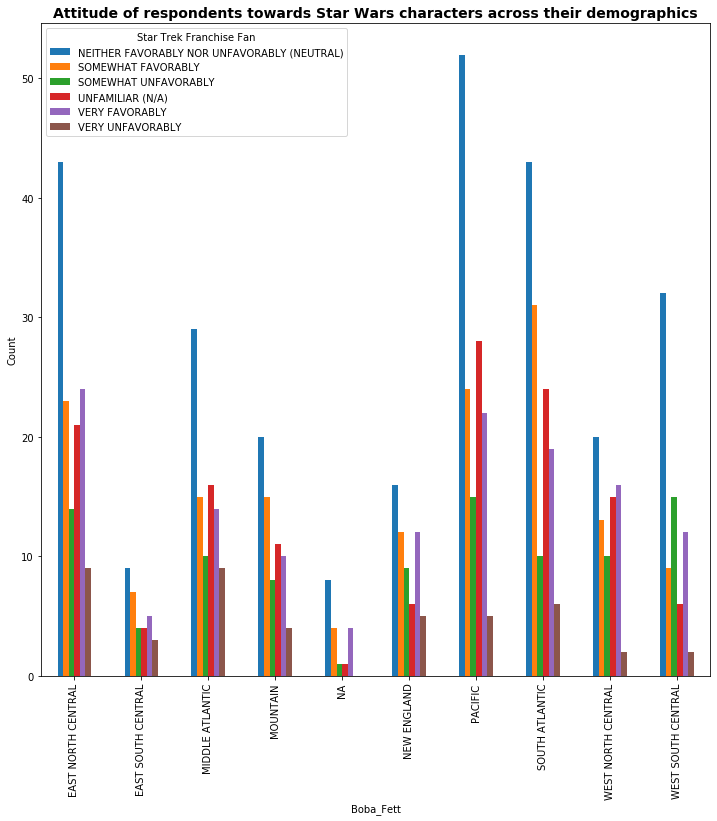

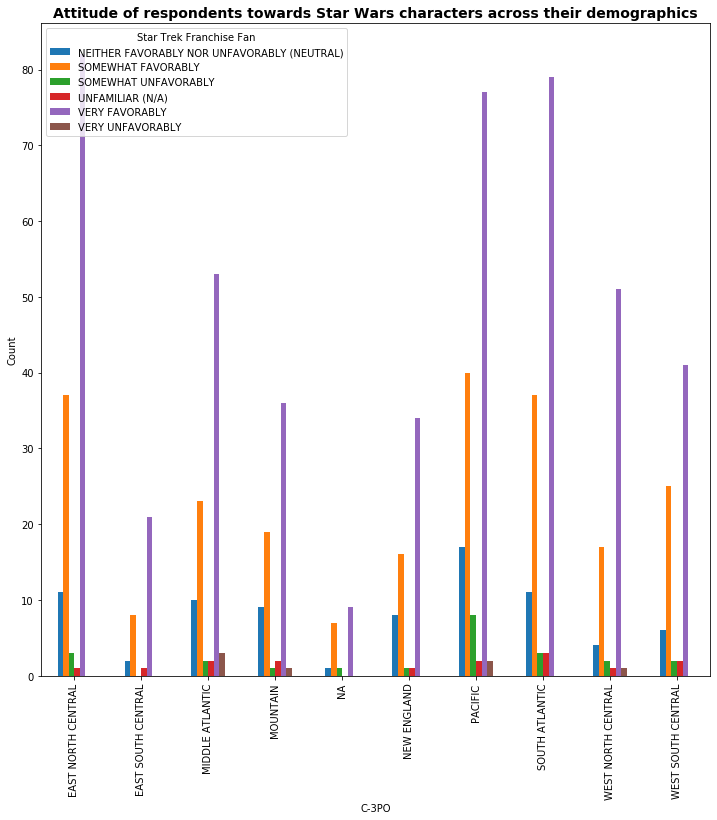

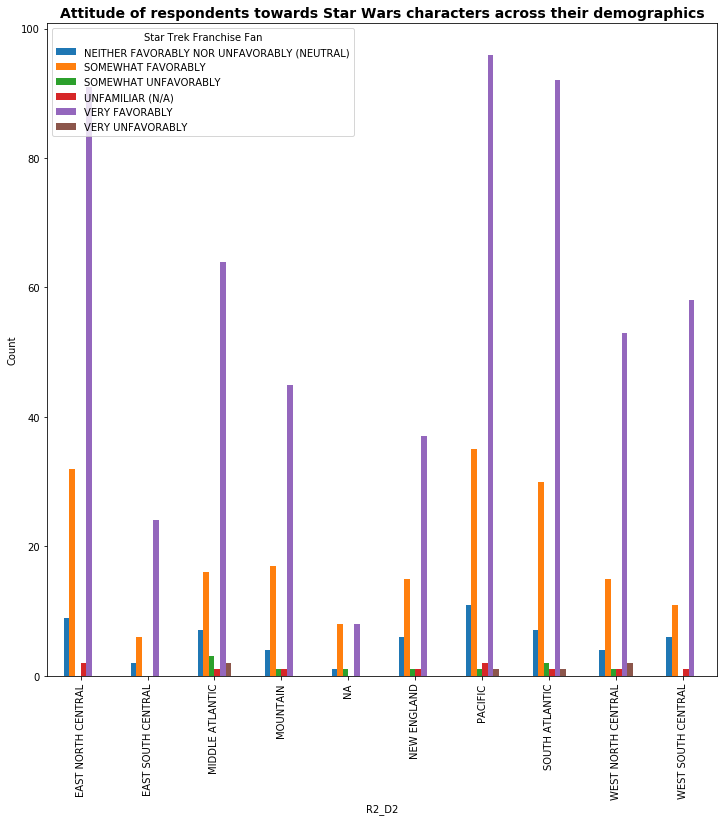

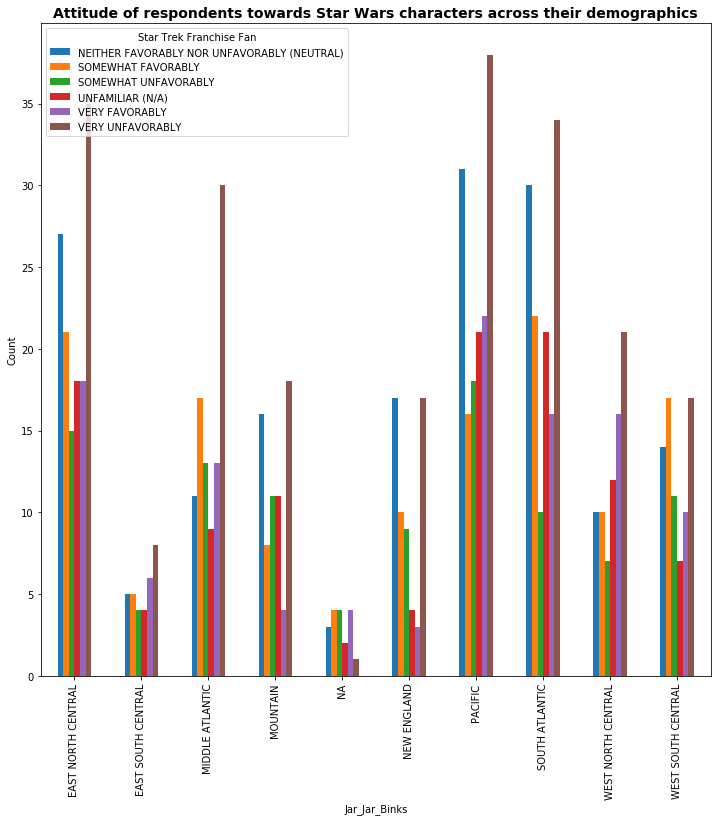

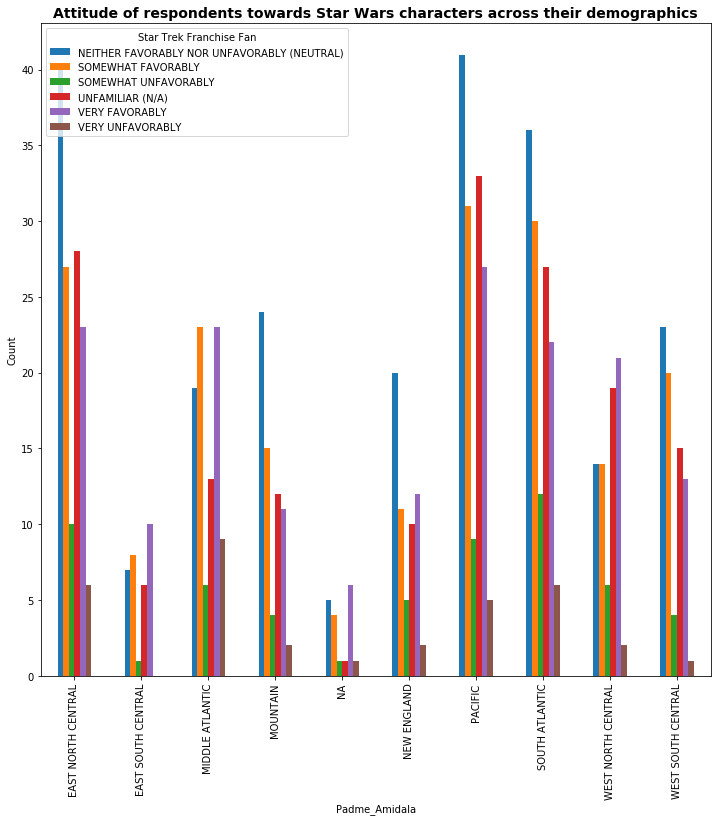

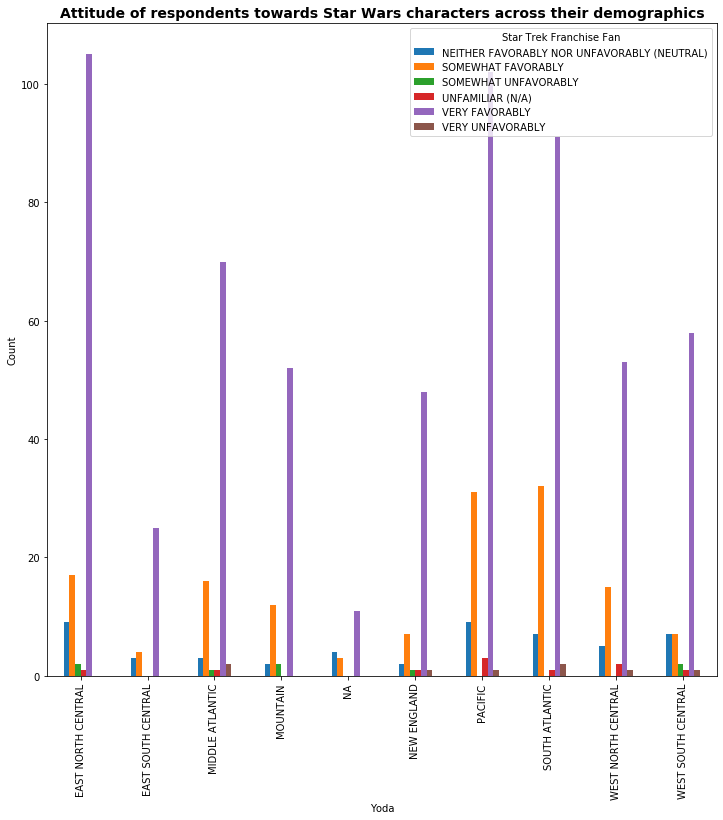

In [55]:
for cols in demographics:
    for cola in Rate_char:
        ax=pd.crosstab(data_drop[cols],data_drop[cola]).plot(kind='bar')
        plt.title( 'Attitude of respondents towards Star Wars characters across their demographics',fontweight='bold',fontsize=14)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width*2, box.height*3])
        plt.xlabel(cola)
        plt.ylabel('Count')
        
        plt.legend(title='Star Trek Franchise Fan')
        plt.show()